# About
The dataset describes 24,675 rows of up-to-date information on tourist expenditure collected by the National Bureau of Statistics (NBS) in Tanzania.The dataset was collected to gain a better understanding of the status of the tourism sector and provide an instrument that will enable sector growth.

Your goal is to accurately classify the range of expenditures a tourist spends in Tanzania.

The majority of the visitors under the age group of 25-44 came for business (18.5%), or leisure and holidays (53.2%), which is consistent with the fact that they are economically more productive. Those at the age group of 45-64 were more prominent in holiday making and visiting friends and relatives. The results further reveal that most visitors belonging to the age group of 18-24 came for leisure and holidays (55.3%) as well as volunteering (13.7%). The majority of senior citizens (65 and above) came for leisure and holidays (80.9%) and visiting friends and relatives (9.5%).

The survey covers seven departure points, namely: Julius Nyerere International Airport, Kilimanjaro International Airport, Abeid Amani Karume International Airport, and the Namanga, Tunduma, Mtukula and Manyovu border points.

# Import the Neccessary Packages

In [220]:
import warnings

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.offline as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
import plotly.io as pio
import plotly.express as px

plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action = 'ignore', category = FutureWarning)

#import graphing

# import mglearn

# Importing dataset

In [268]:
Test = pd.read_csv('Test.csv')
Train =pd.read_csv('Train.csv')


EDA
Understand the type of data.
Check if there are any biases in your dataset.

In [222]:
print(' The shape of the Train is ;')
Train.shape

 The shape of the Train is ;


(18506, 21)

In [223]:
print(' Whiles Test have a shape of;')
Test.shape


 Whiles Test have a shape of;


(6169, 20)

In [224]:
Train.dtypes

Tour_ID                   object
country                   object
age_group                 object
travel_with               object
total_female             float64
total_male               float64
purpose                   object
main_activity             object
info_source               object
tour_arrangement          object
package_transport_int     object
package_accomodation      object
package_food              object
package_transport_tz      object
package_sightseeing       object
package_guided_tour       object
package_insurance         object
night_mainland             int64
night_zanzibar             int64
first_trip_tz             object
cost_category             object
dtype: object

In [225]:
Train.describe().transpose().round(2)

count  mean    std  min  25%  50%   75%    max
total_female    18504.0  0.94   1.22  0.0  0.0  1.0   1.0   49.0
total_male      18500.0  1.00   1.17  0.0  1.0  1.0   1.0   58.0
night_mainland  18506.0  9.14  14.13  0.0  3.0  6.0  11.0  365.0
night_zanzibar  18506.0  2.49   5.28  0.0  0.0  0.0   4.0  240.0

In [226]:
#List the columns for different datatypes:
print('List of all Columns: ')
print(Train.columns)
print('\n')
print('Integer Type: ')
Col_int = Train.select_dtypes(np.int64).columns
print(Col_int)
print('\n')
print('Float Type: ')
Col_float = Train.select_dtypes(np.float64).columns
print(Col_float)
print('\n')
print('Object Type: ')
Col_cat = Train.select_dtypes(object).columns
print(Col_cat)
print('\n')
print('Count:')
print(Train.dtypes.value_counts())

List of all Columns: 
Index(['Tour_ID', 'country', 'age_group', 'travel_with', 'total_female',
       'total_male', 'purpose', 'main_activity', 'info_source',
       'tour_arrangement', 'package_transport_int', 'package_accomodation',
       'package_food', 'package_transport_tz', 'package_sightseeing',
       'package_guided_tour', 'package_insurance', 'night_mainland',
       'night_zanzibar', 'first_trip_tz', 'cost_category'],
      dtype='object')


Integer Type: 
Index(['night_mainland', 'night_zanzibar'], dtype='object')


Float Type: 
Index(['total_female', 'total_male'], dtype='object')


Object Type: 
Index(['Tour_ID', 'country', 'age_group', 'travel_with', 'purpose',
       'main_activity', 'info_source', 'tour_arrangement',
       'package_transport_int', 'package_accomodation', 'package_food',
       'package_transport_tz', 'package_sightseeing', 'package_guided_tour',
       'package_insurance', 'first_trip_tz', 'cost_category'],
      dtype='object')


Count:
object     1

# Get summary statistics for categorical variables:

In [227]:
# Let take a look at the Object Type

Train.describe(include='object').transpose()

count unique                          top   freq
Tour_ID                18506  18506              tour_id1hffseyw      1
country                18506    131     UNITED STATES OF AMERICA   2846
age_group              18506      5                        25-44   9047
travel_with            17431      5                        Alone   7590
purpose                18506      8         Leisure and Holidays  11755
main_activity          18506     10              Widlife Tourism   5988
info_source            18506      8  Travel agent, tour operator   8005
tour_arrangement       18506      2                 Package Tour   9295
package_transport_int  18506      2                           No  12238
package_accomodation   18506      2                           No   9541
package_food           18506      2                           No  10143
package_transport_tz   18506      2                           No  10873
package_sightseeing    18506      2                           No  12786
package_guided_tour    18506      2                           No  12447
package_insurance      18506      2                           No  15809
first_trip_tz          18506      2                          Yes  12737
cost_category          18506      6                  Normal Cost   5471

# Note
----------------------------------------------------------------
The majority of the visitors under the age group of 25-44 came for business (18.5%), or leisure and holidays (53.2%), which is consistent with the fact that they are economically more productive. Those at the age group of 45-64 were more prominent in holiday making and visiting friends and relatives. The results further reveal that most visitors belonging to the age group of 18-24 came for leisure and holidays (55.3%) as well as volunteering (13.7%). The majority of senior citizens (65 and above) came for leisure and holidays (80.9%) and visiting friends and relatives (9.5%).
# Let Varify that
-------------------------------------------------------------------------------------------------------------------------------------------------

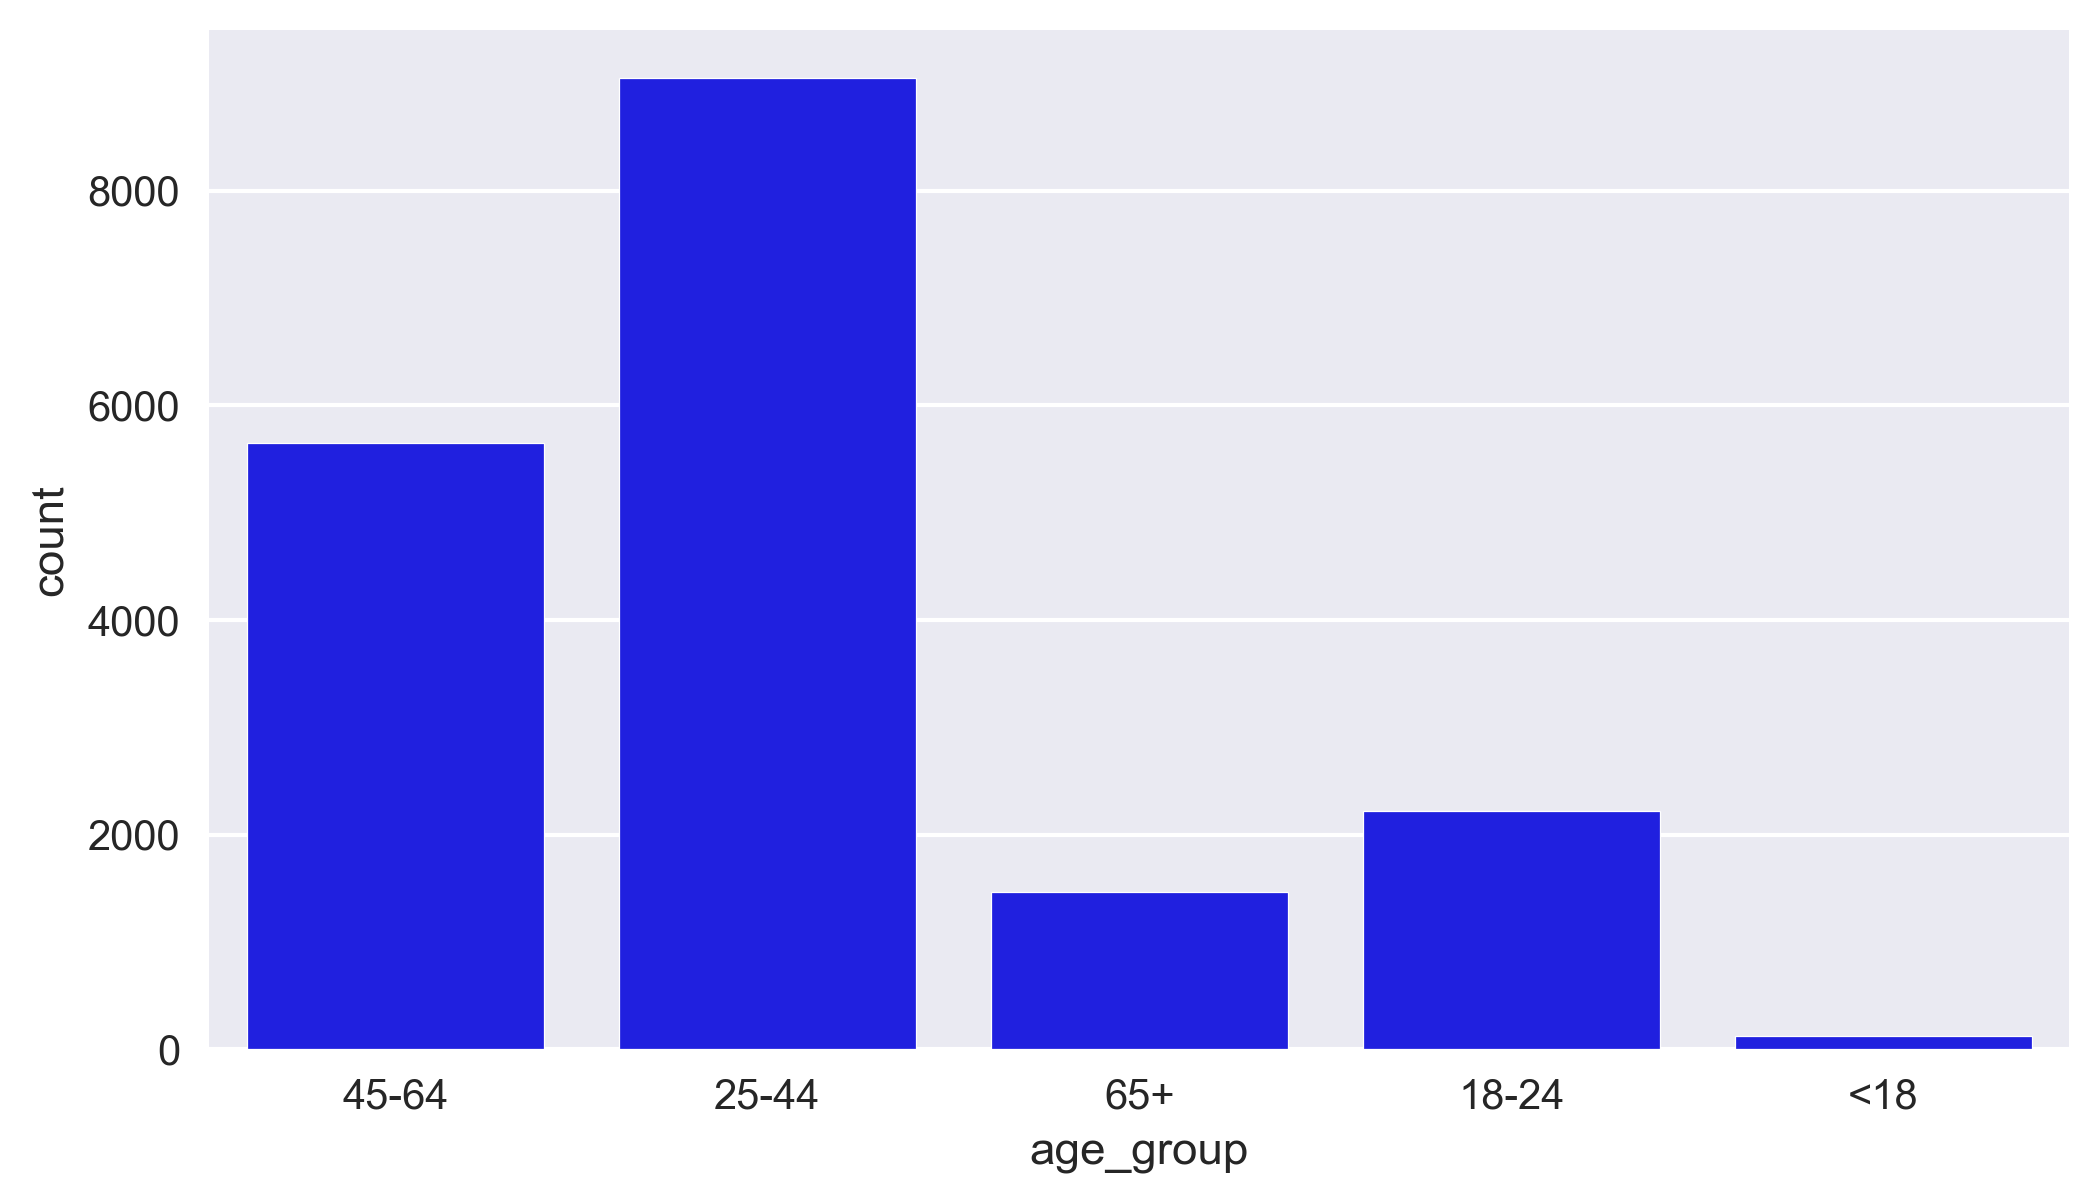

In [228]:
plot_ = sns.countplot(x=Train.age_group.dropna(), color='blue')



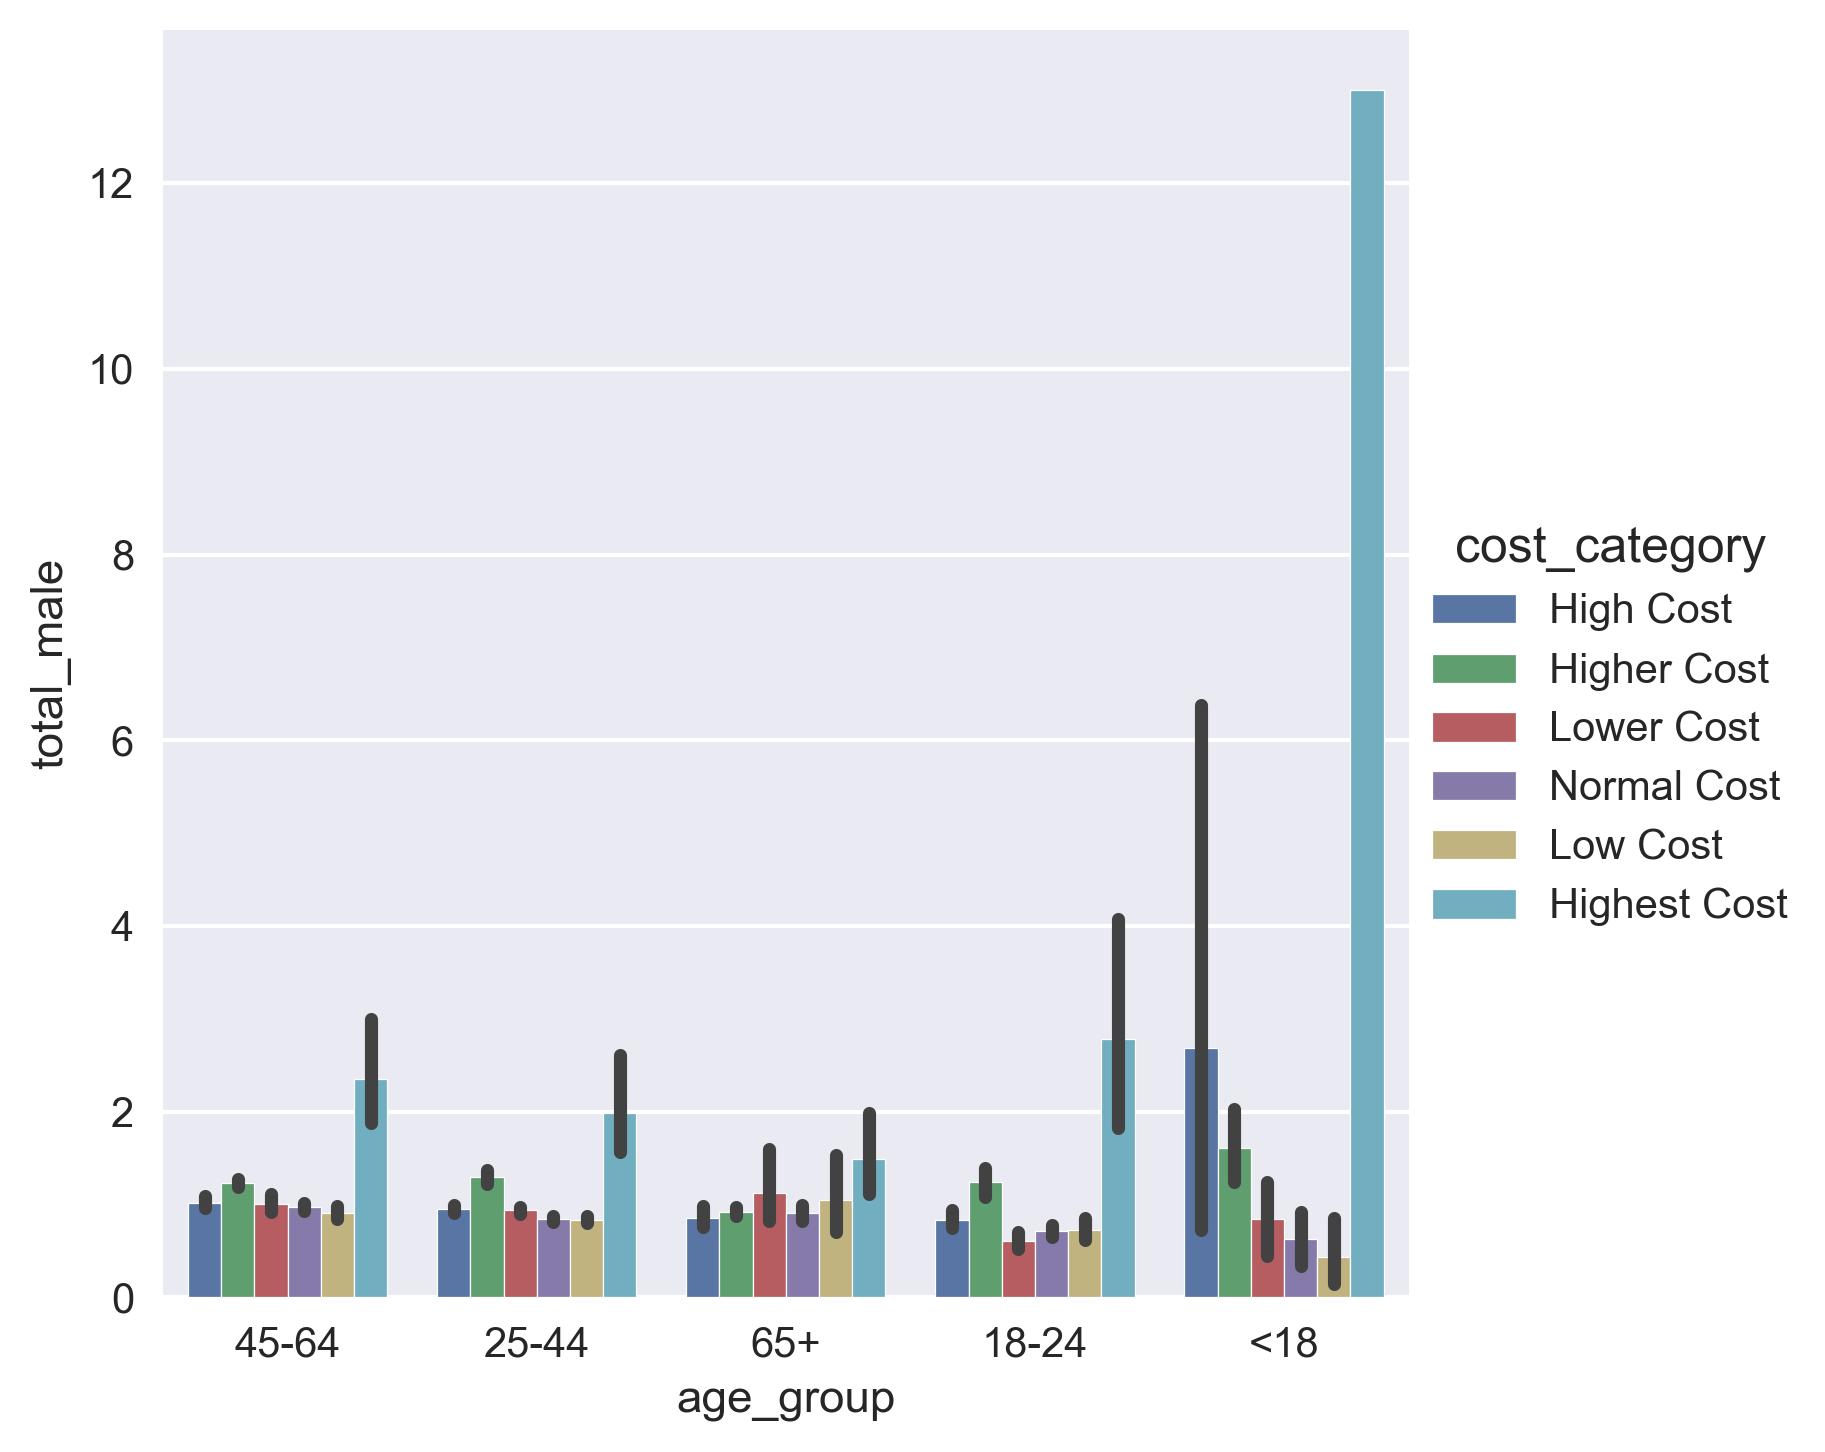

In [229]:

sns.catplot(x="age_group", y="total_male", hue="cost_category", kind="bar", data=Train)

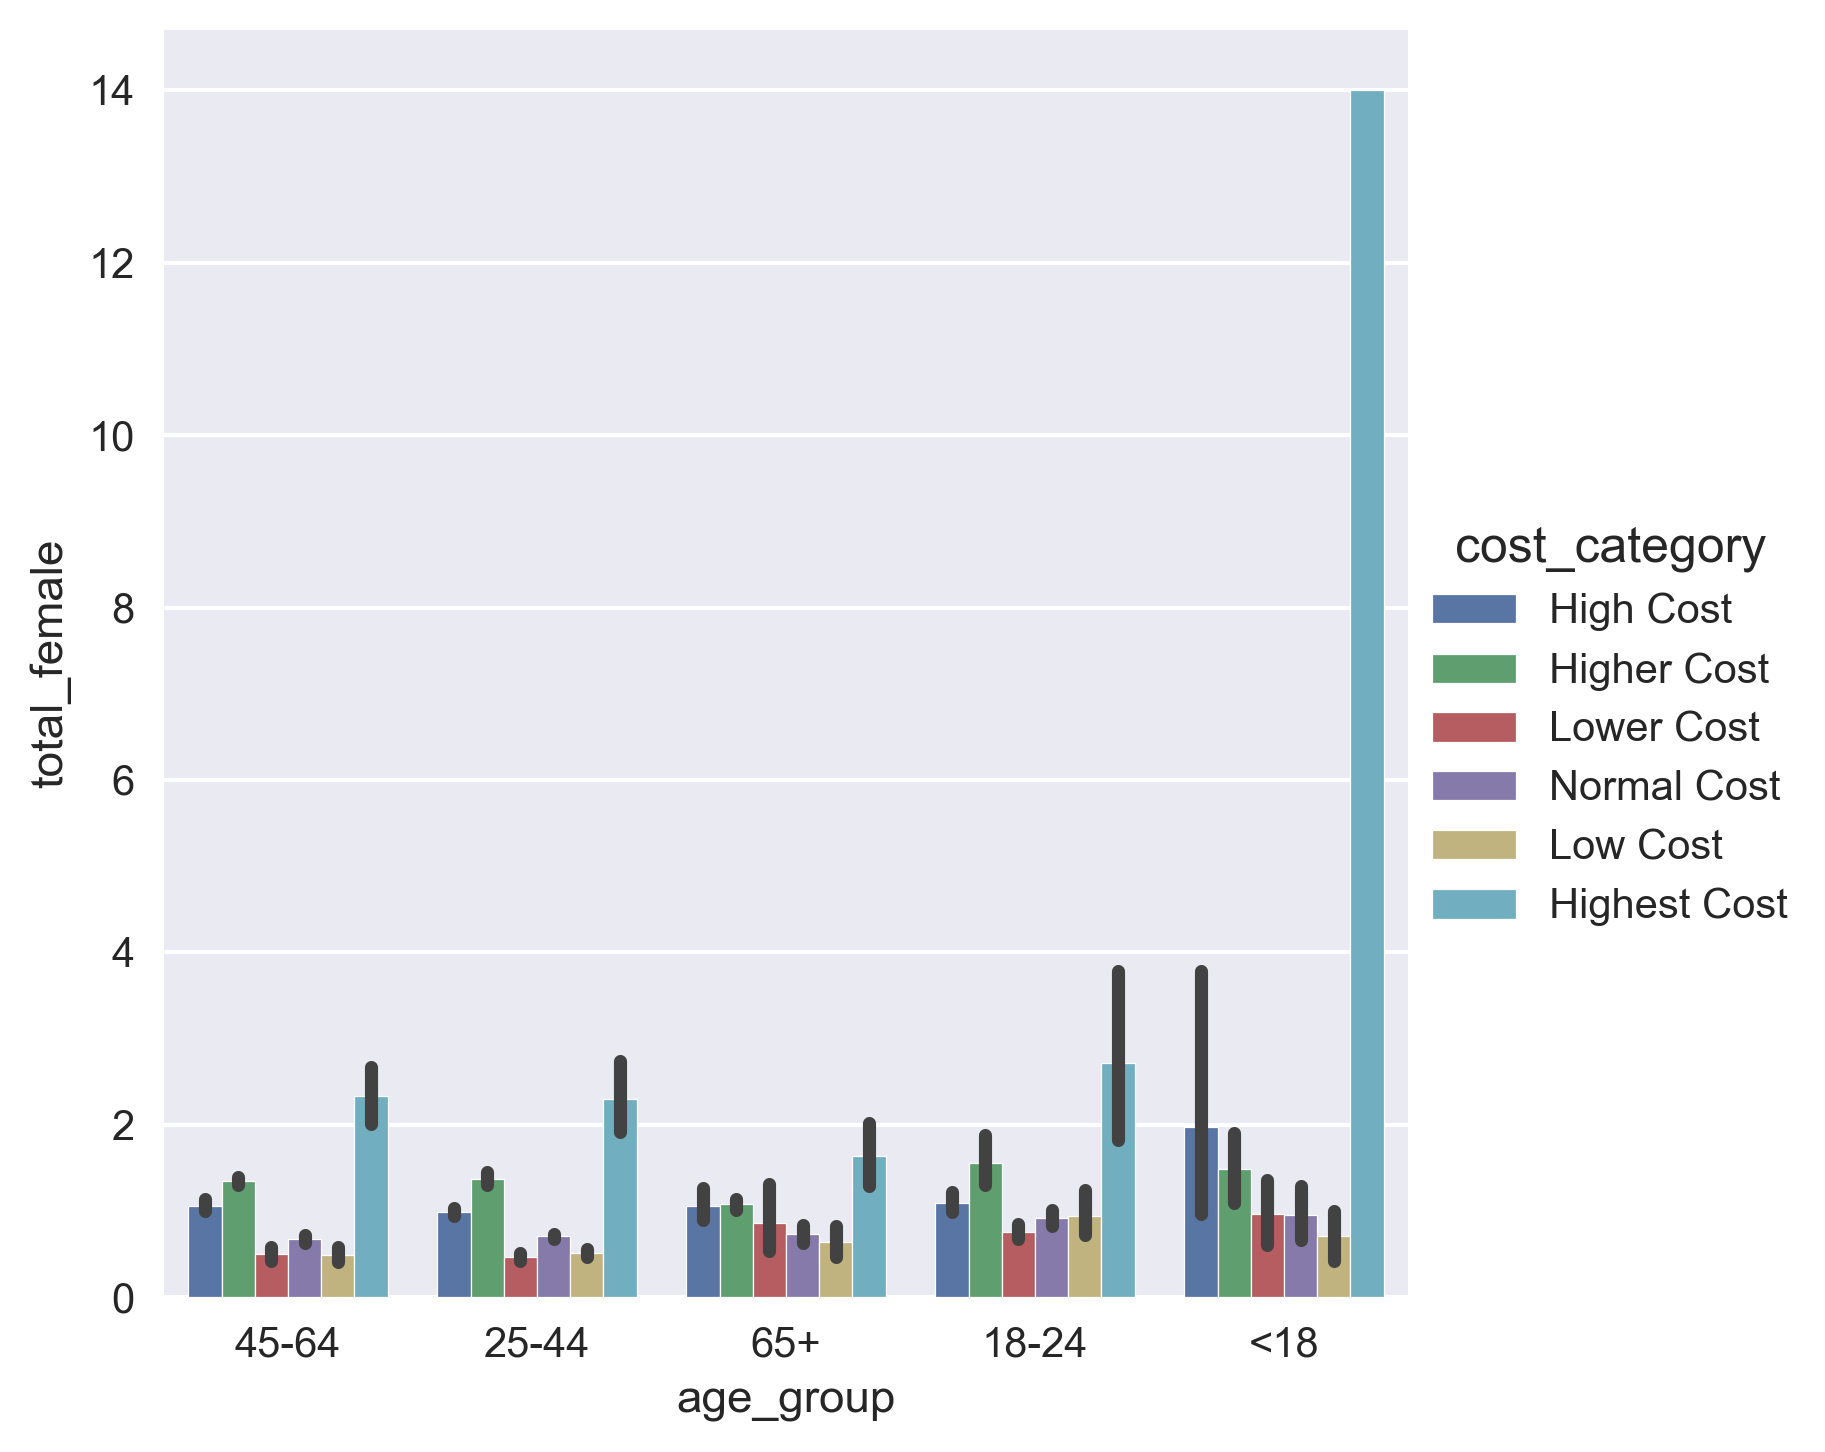

In [230]:

sns.catplot(x="age_group", y="total_female", hue="cost_category", kind="bar", data=Train)

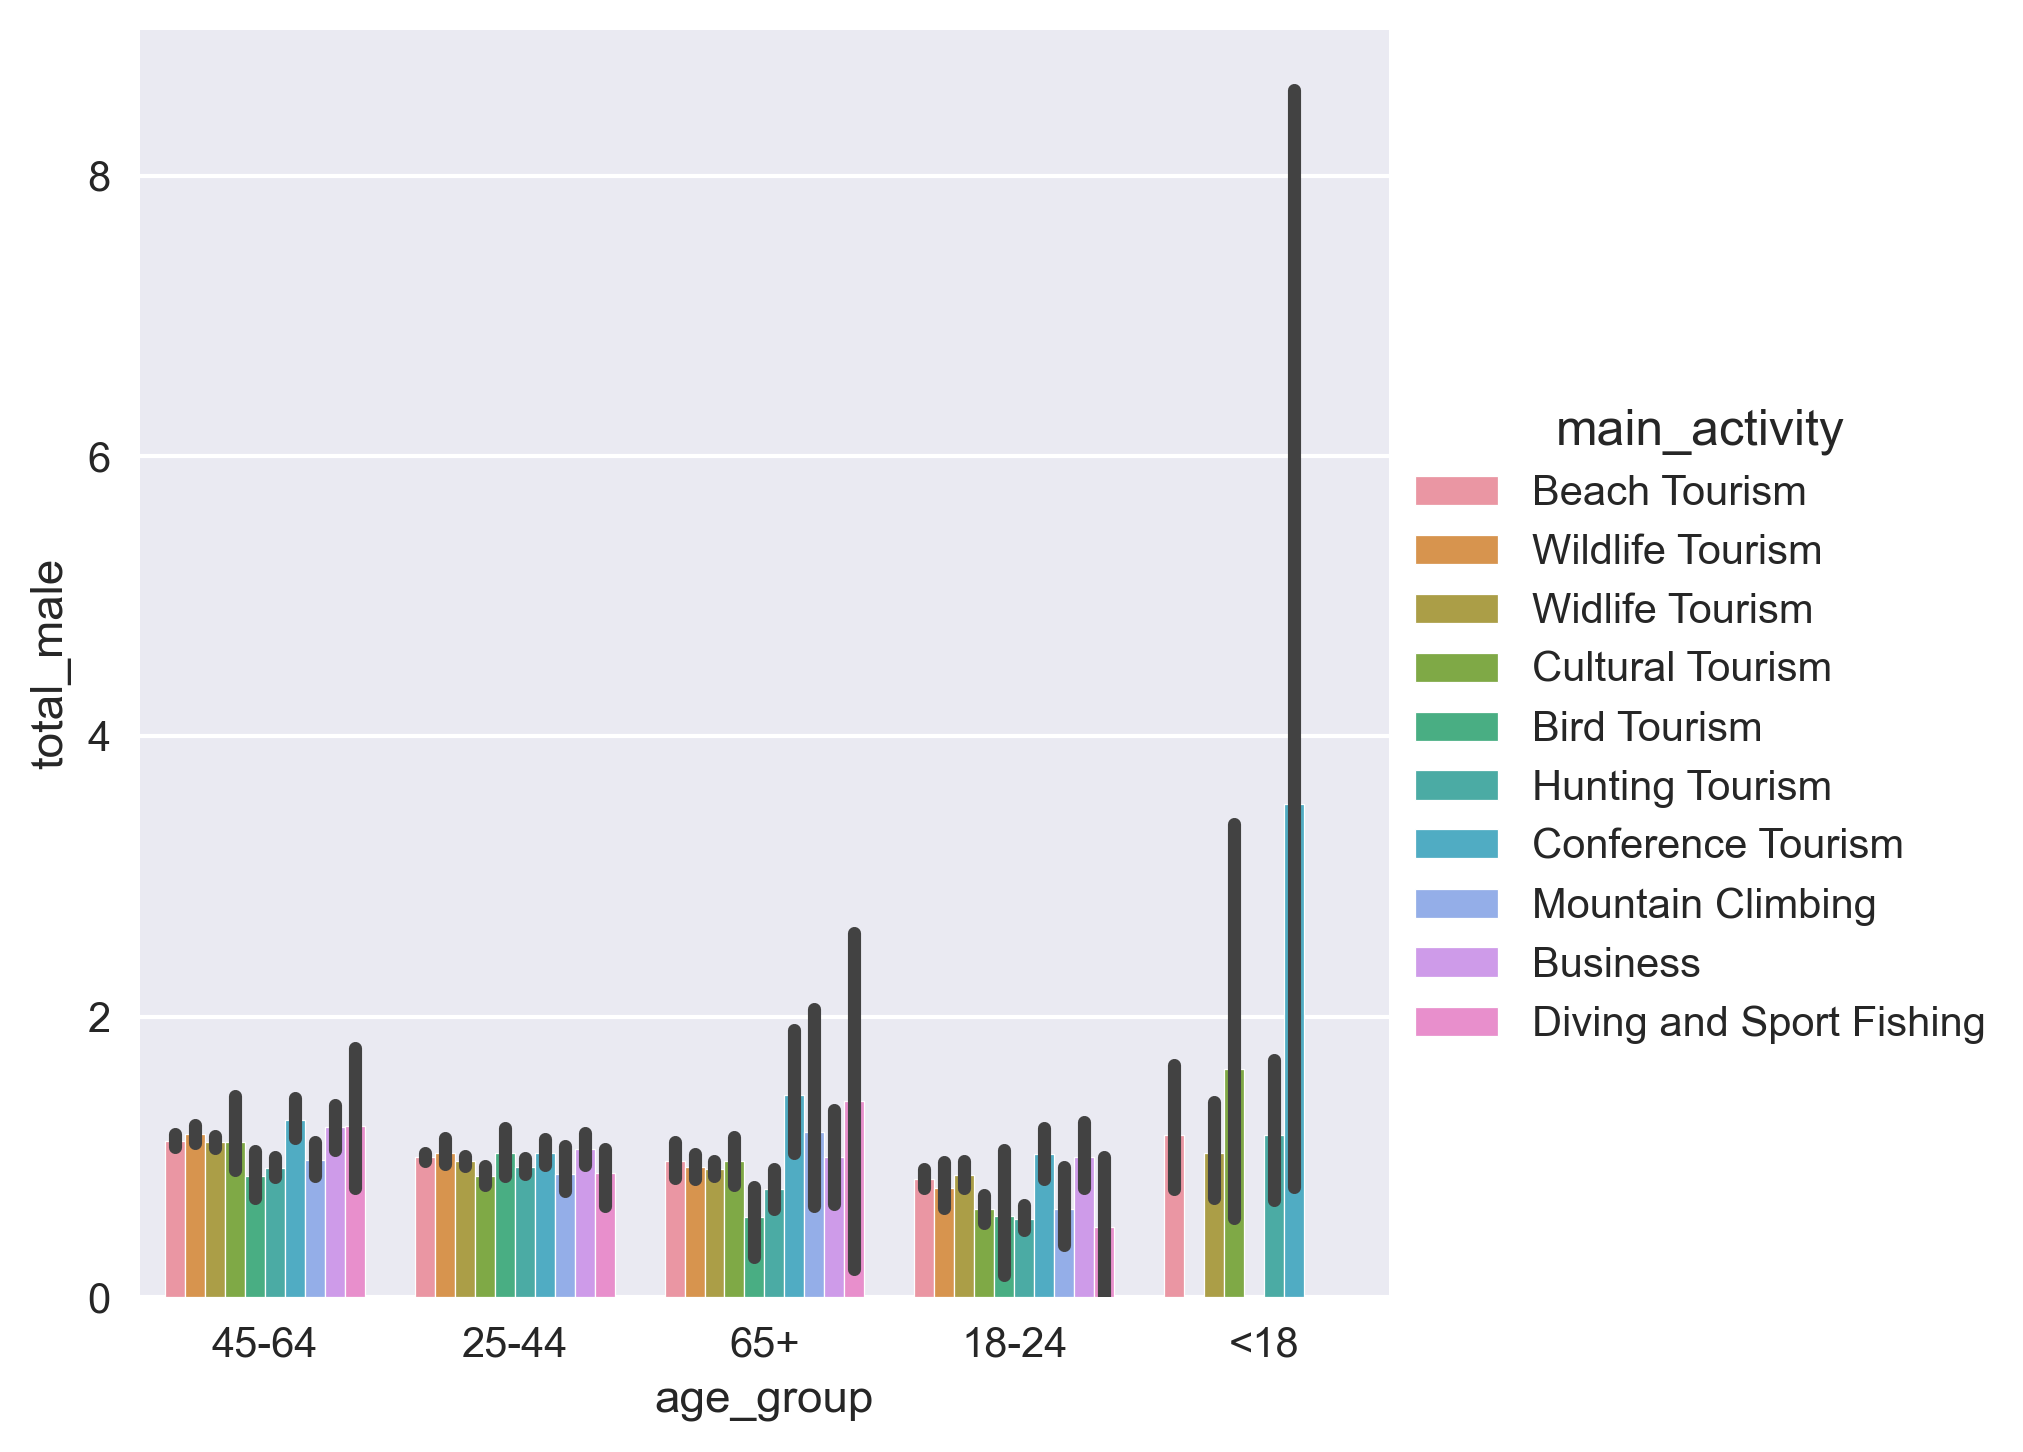

In [231]:

sns.catplot(x="age_group", y="total_male", hue="main_activity", kind="bar", data=Train)

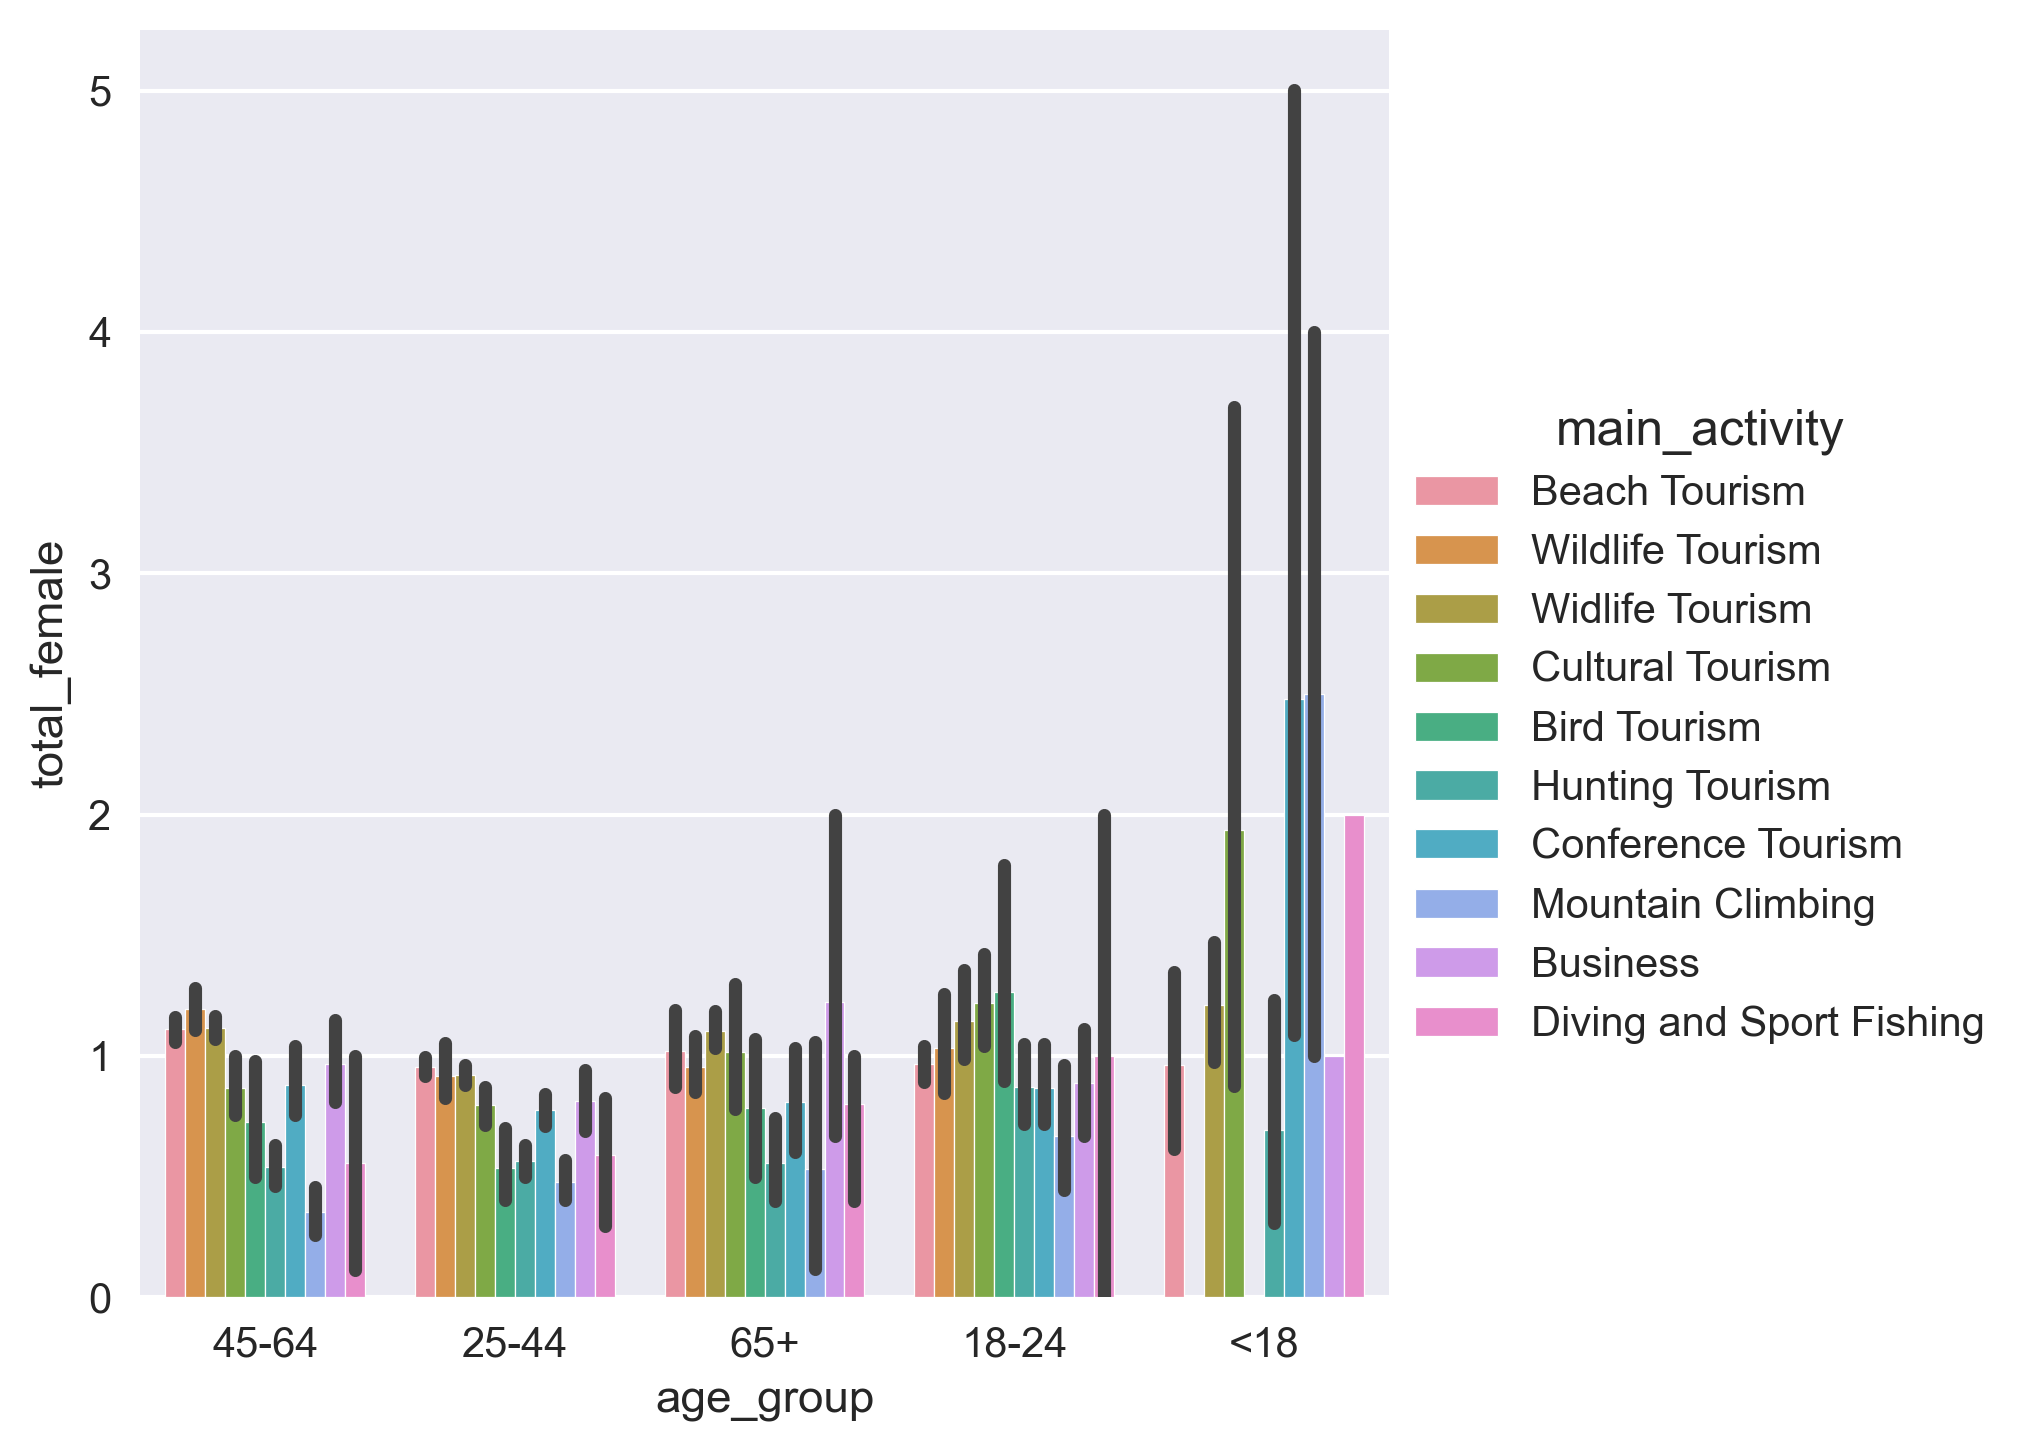

In [232]:
sns.catplot(x="age_group", y="total_female", hue="main_activity", kind="bar", data=Train)

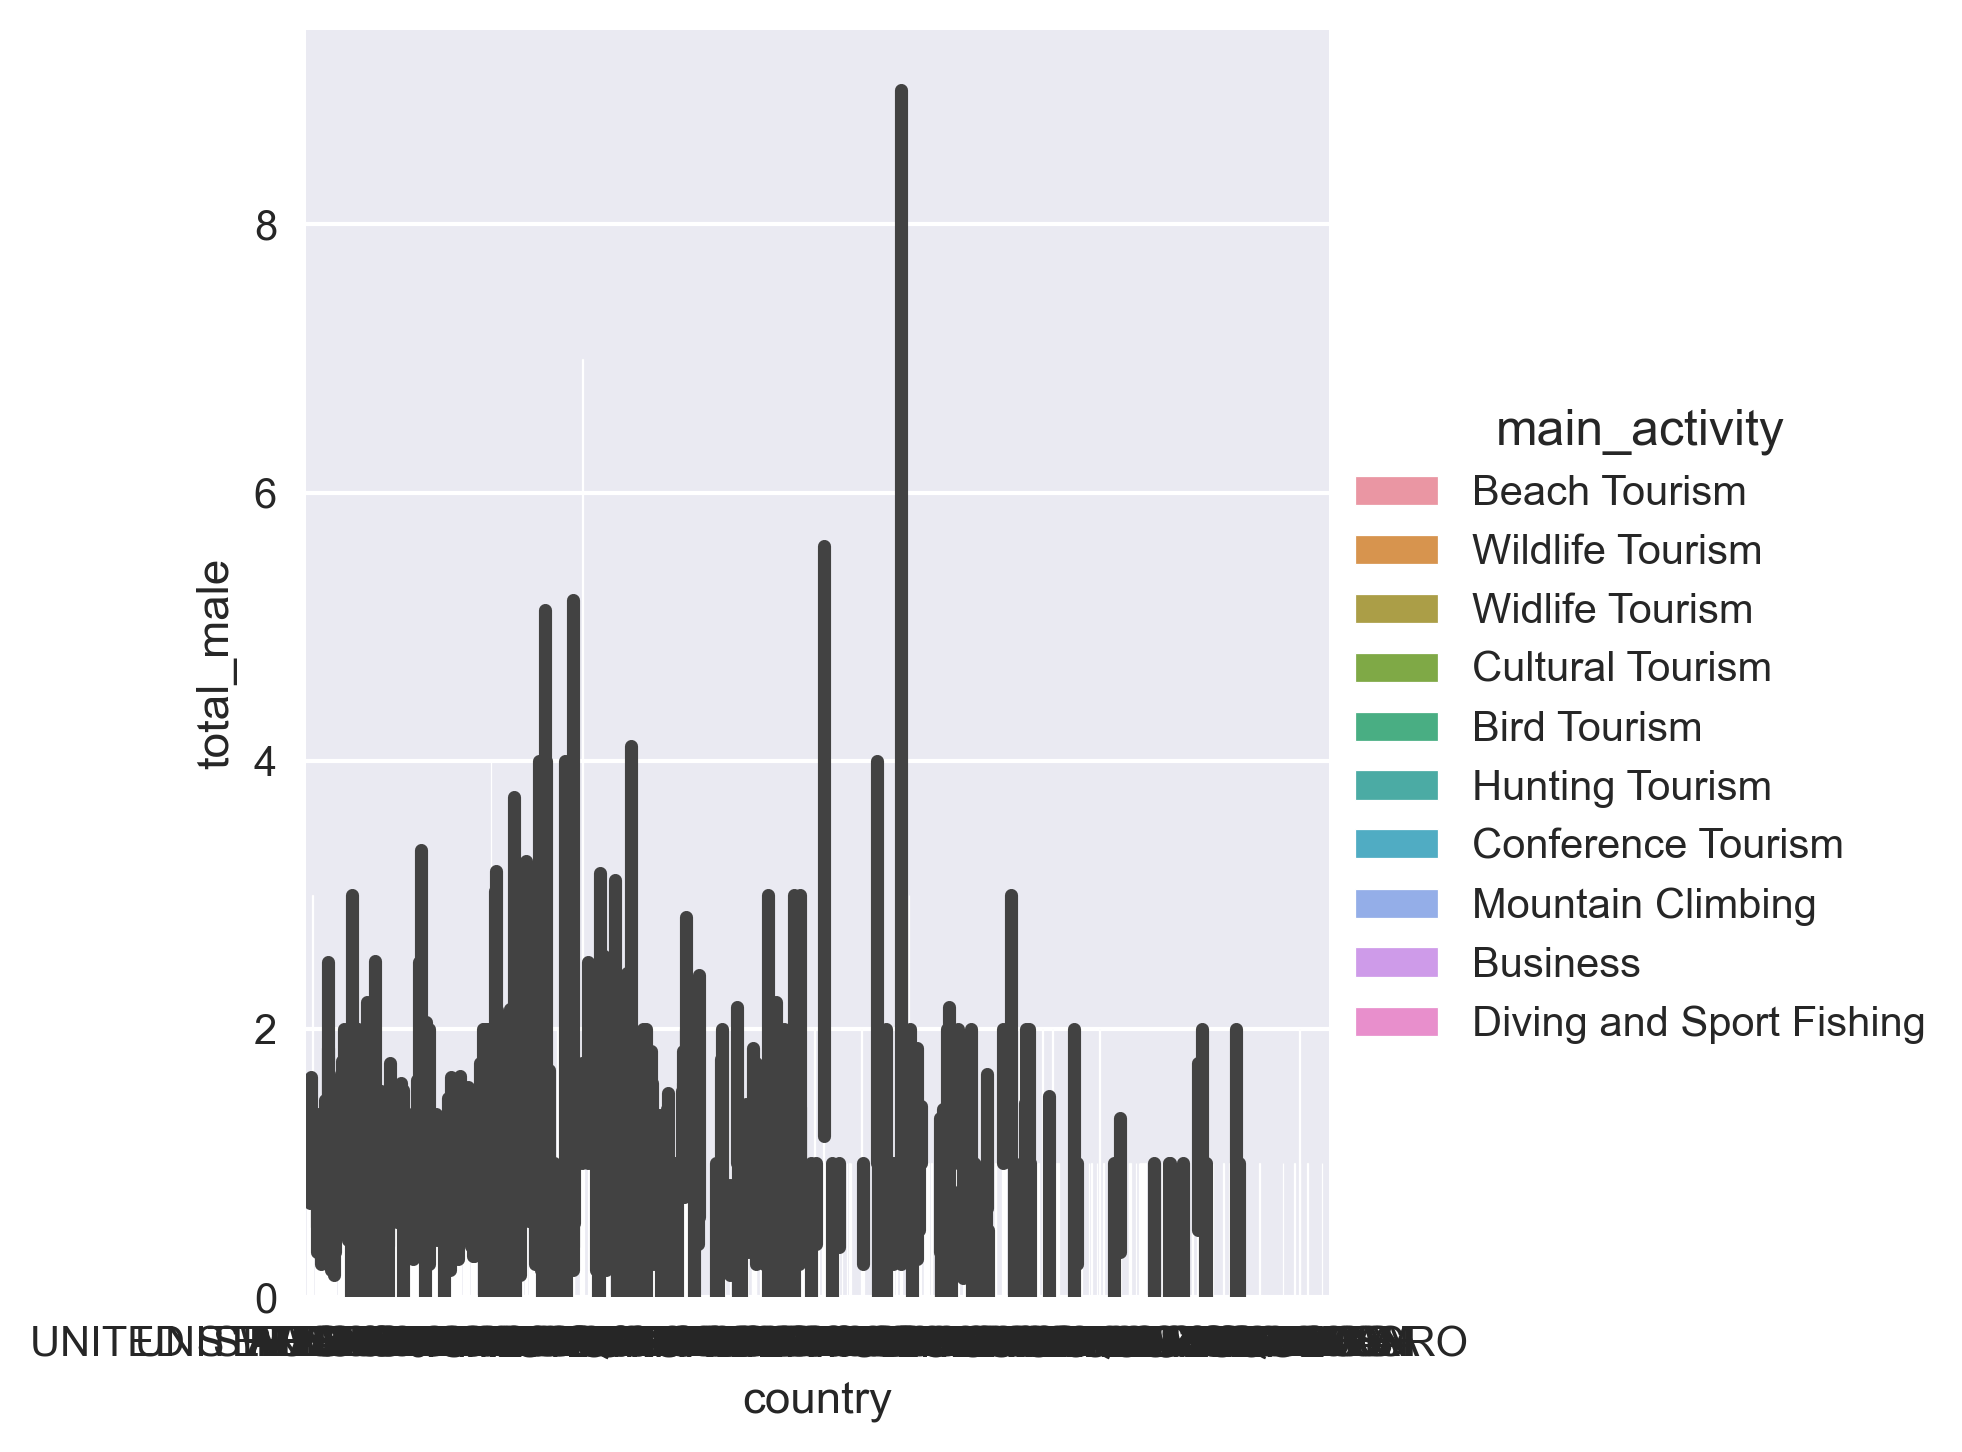

In [233]:

sns.catplot(x="country", y="total_male", hue="main_activity", kind="bar", data=Train)
sns.set(rc = {'figure.figsize':(20,10)})


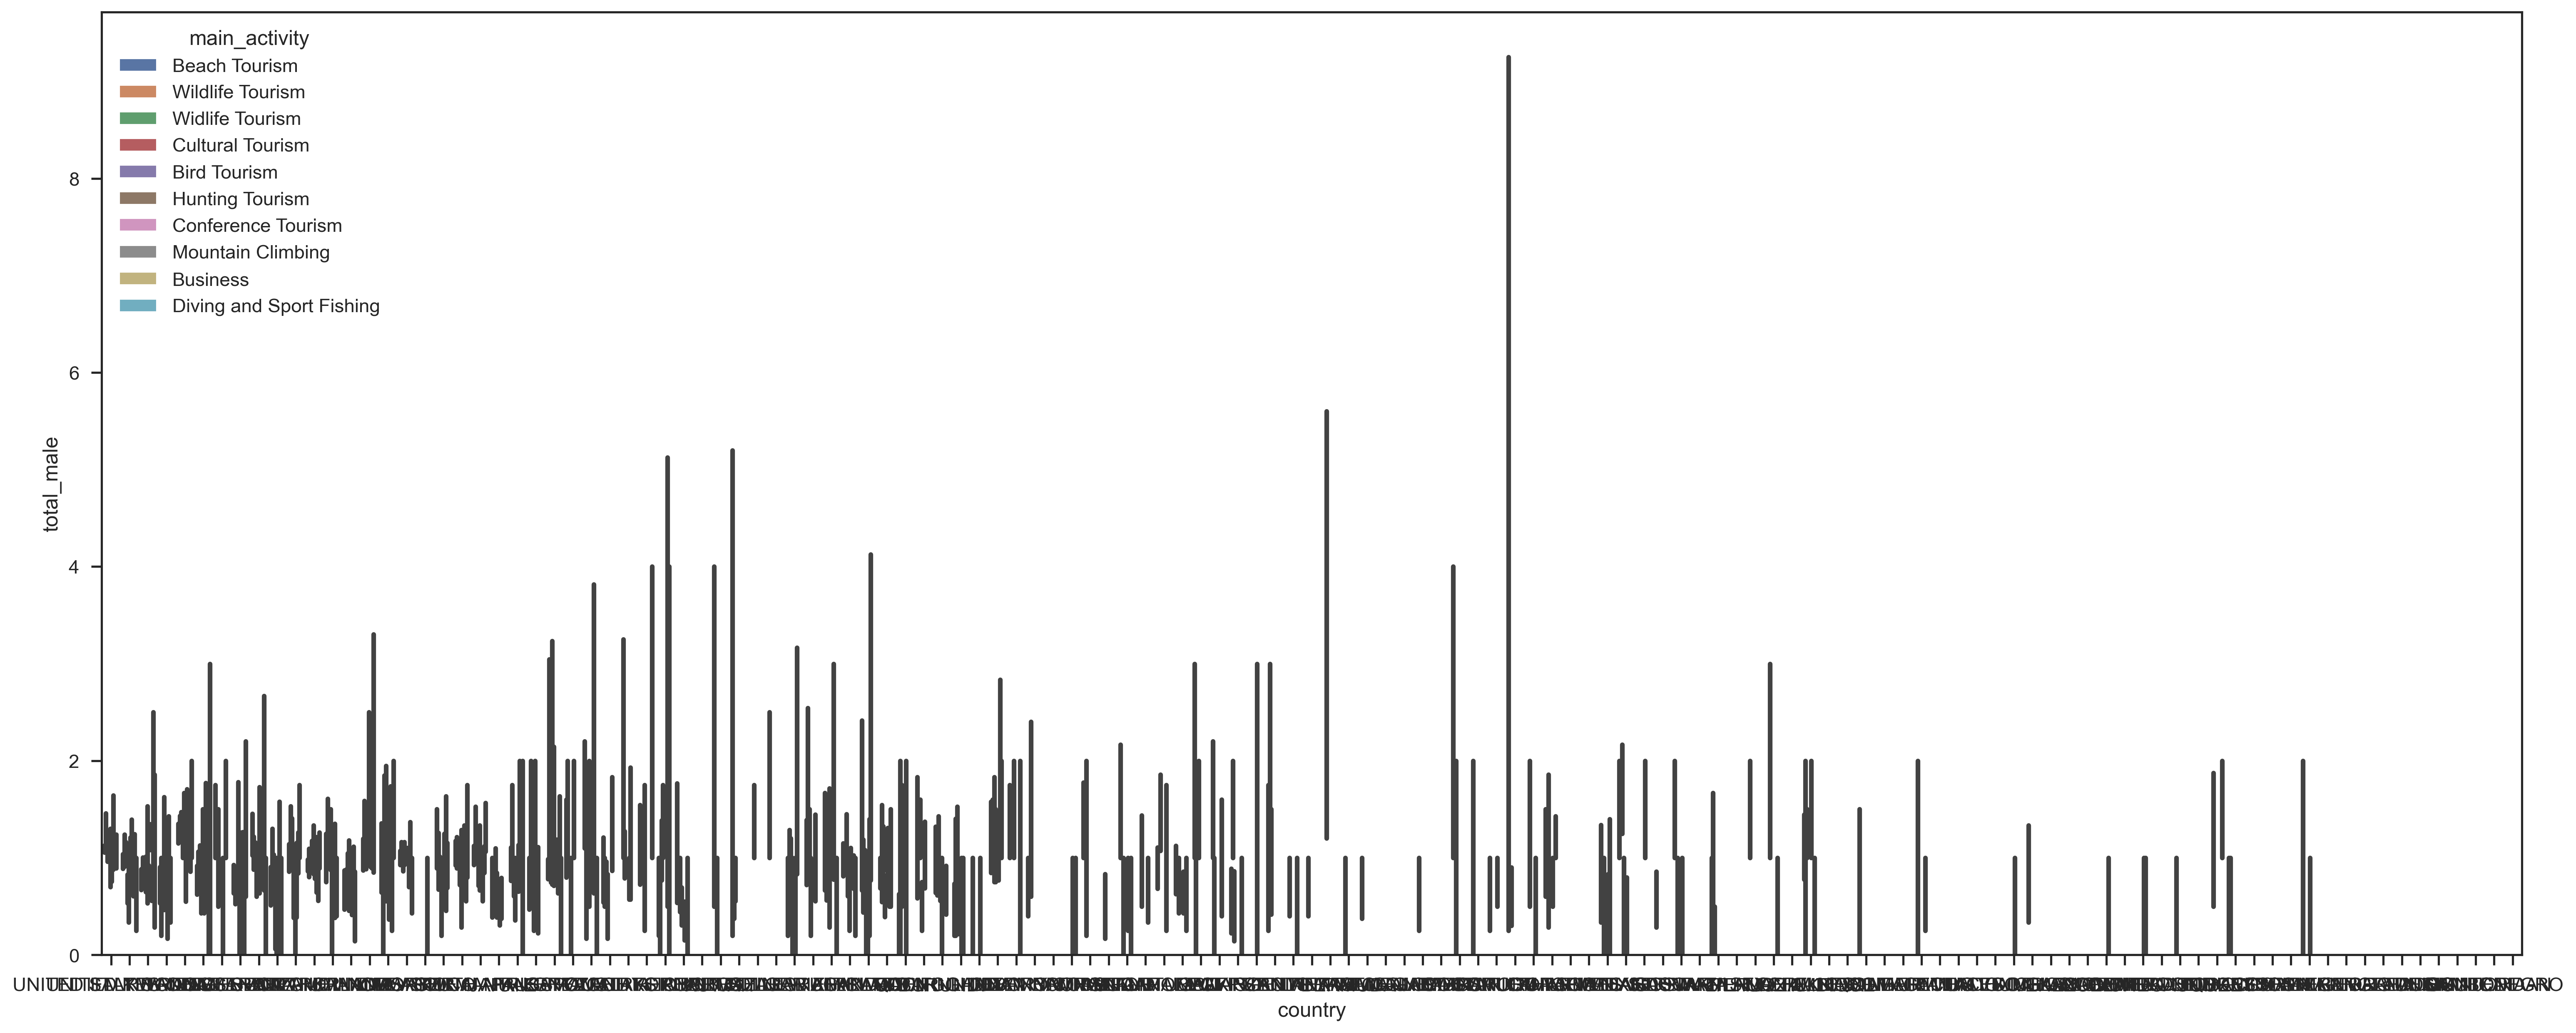

In [234]:
sns.set_style('ticks')
fig,ax = plt.subplots()

fig.set_size_inches(25,10)
sns.barplot(x="country", y="total_male", hue="main_activity",  data=Train, ax=ax)

fig.savefig("plot.png")

In [235]:
Train.age_group.value_counts()

25-44    9047
45-64    5648
18-24    2222
65+      1467
<18       122
Name: age_group, dtype: int64

Preparing Data
Count how many null values are existing in columns.

Clearn Data Remove null value rows of the target variable.

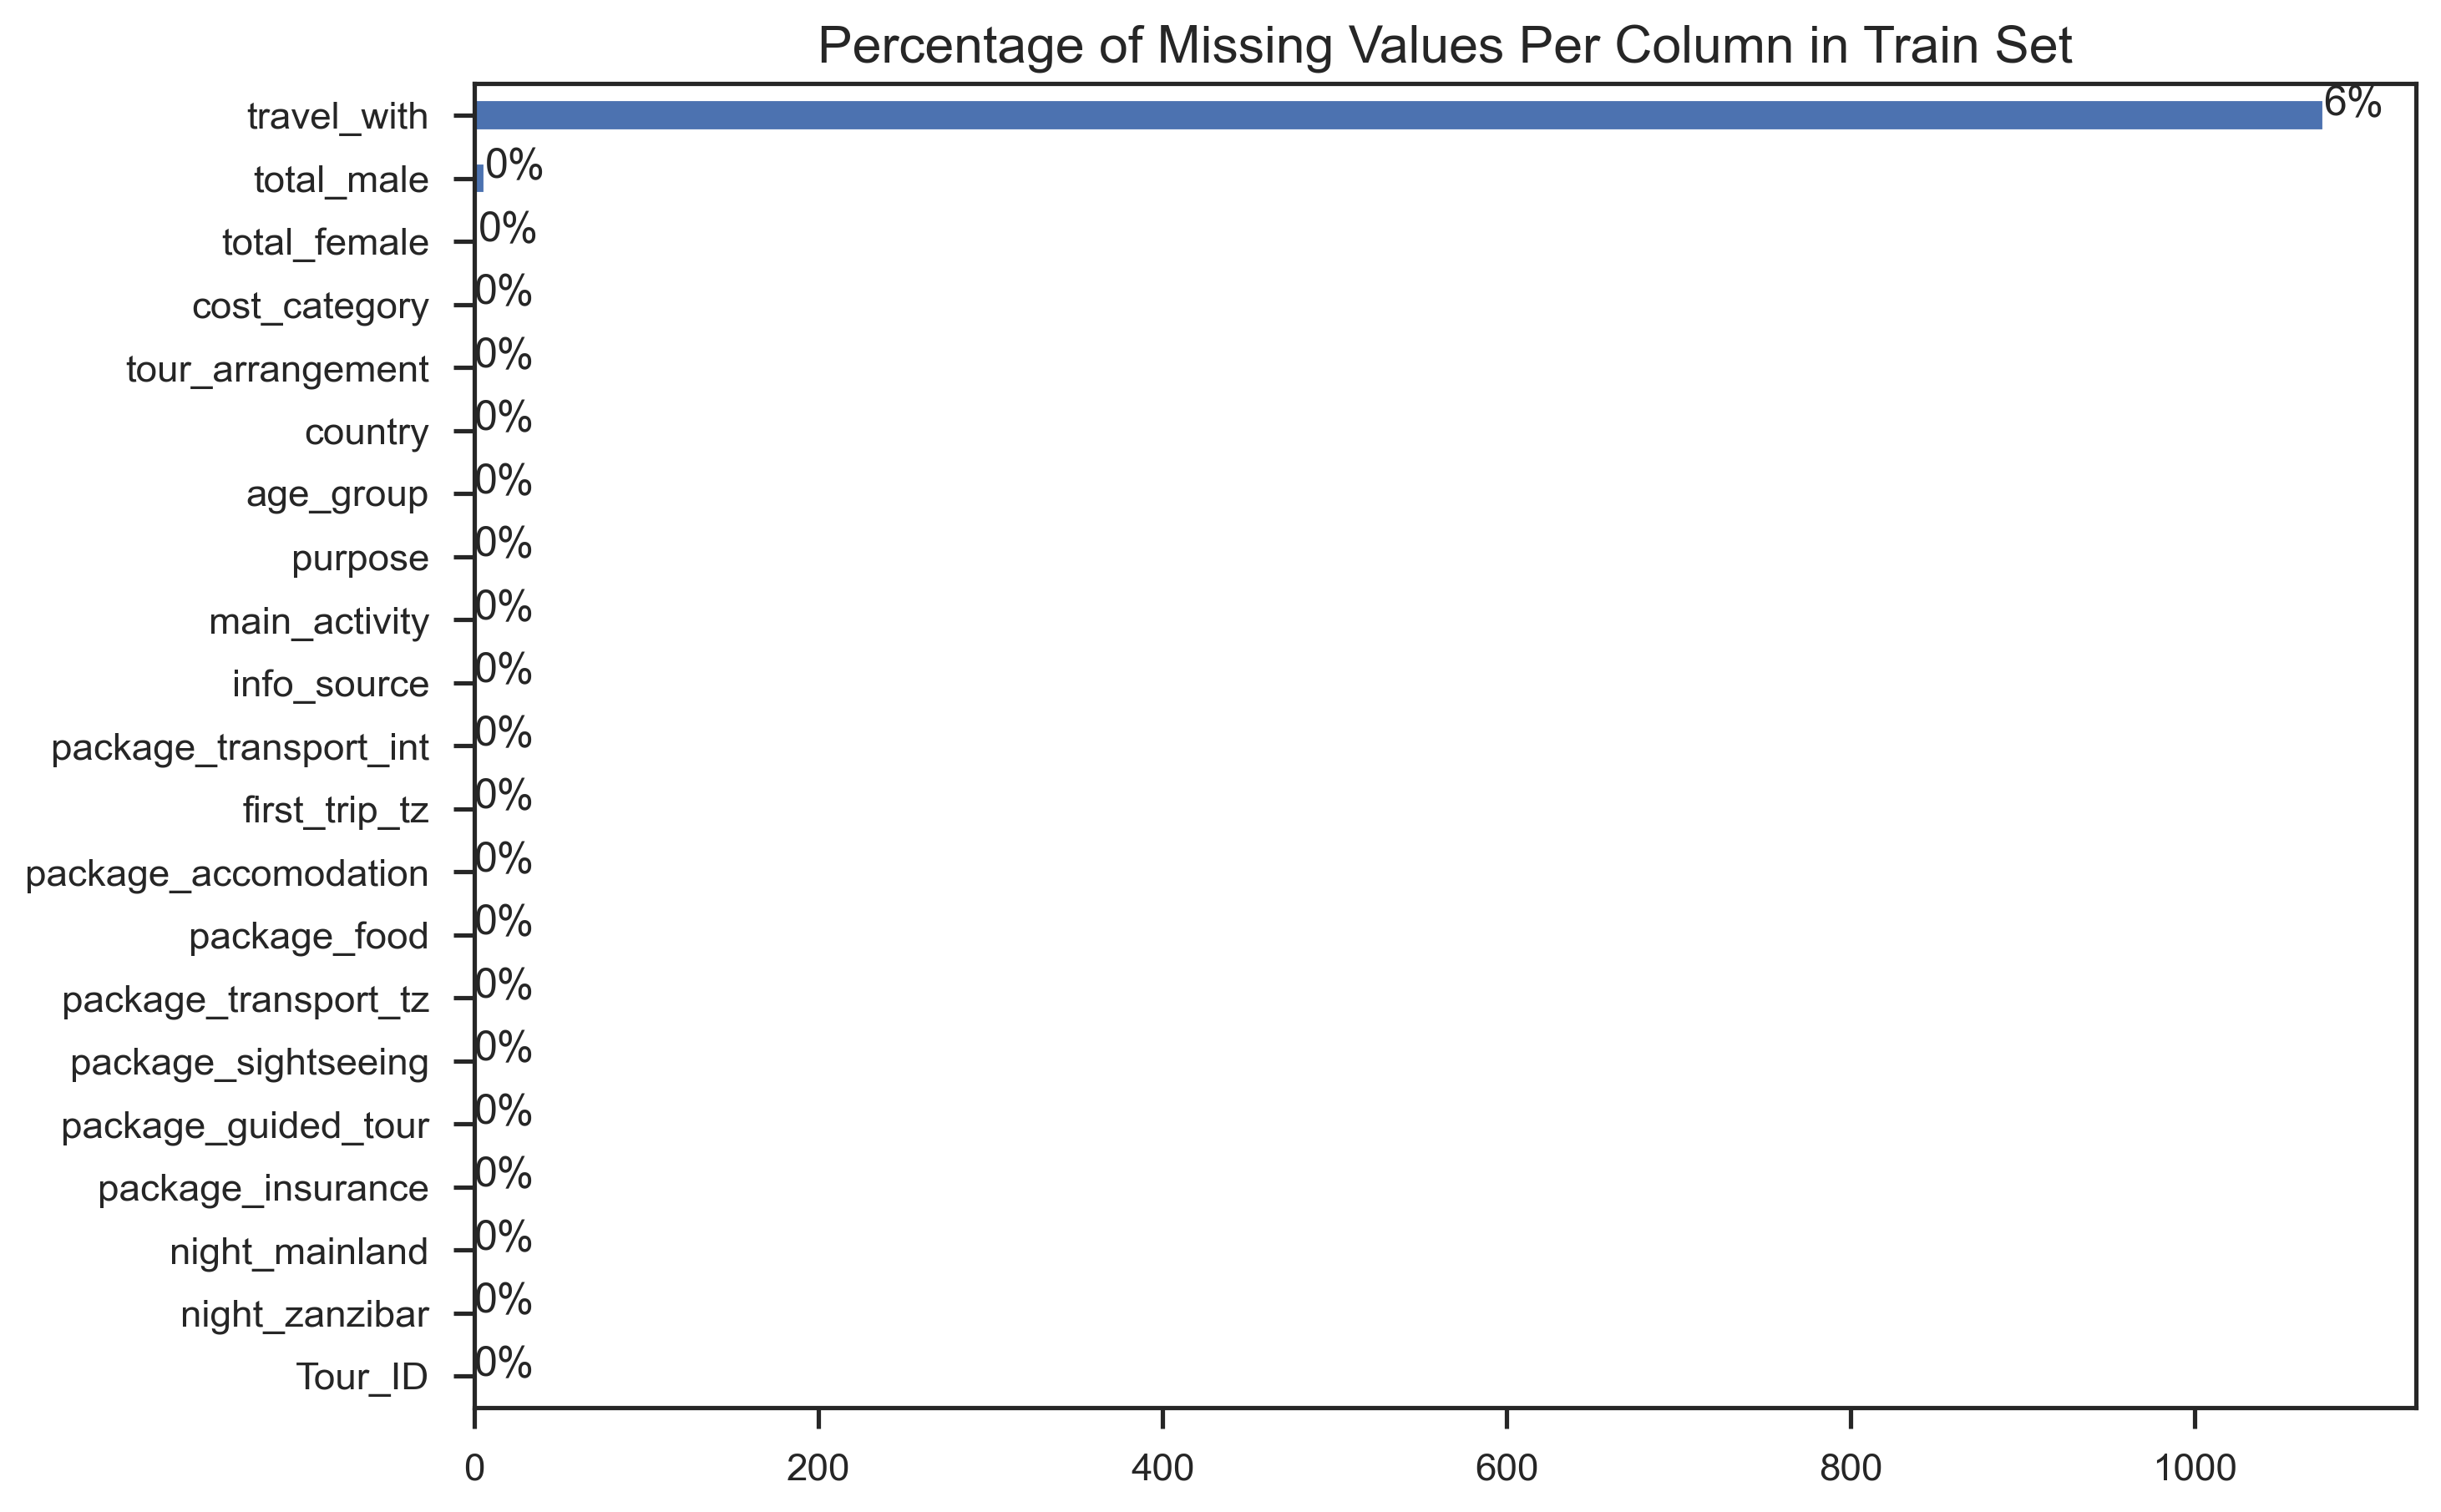

In [236]:
# Check if there any missing values in train set
ax = Train.isna().sum().sort_values().plot(kind = 'barh', figsize = (10, 7))
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/Train.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

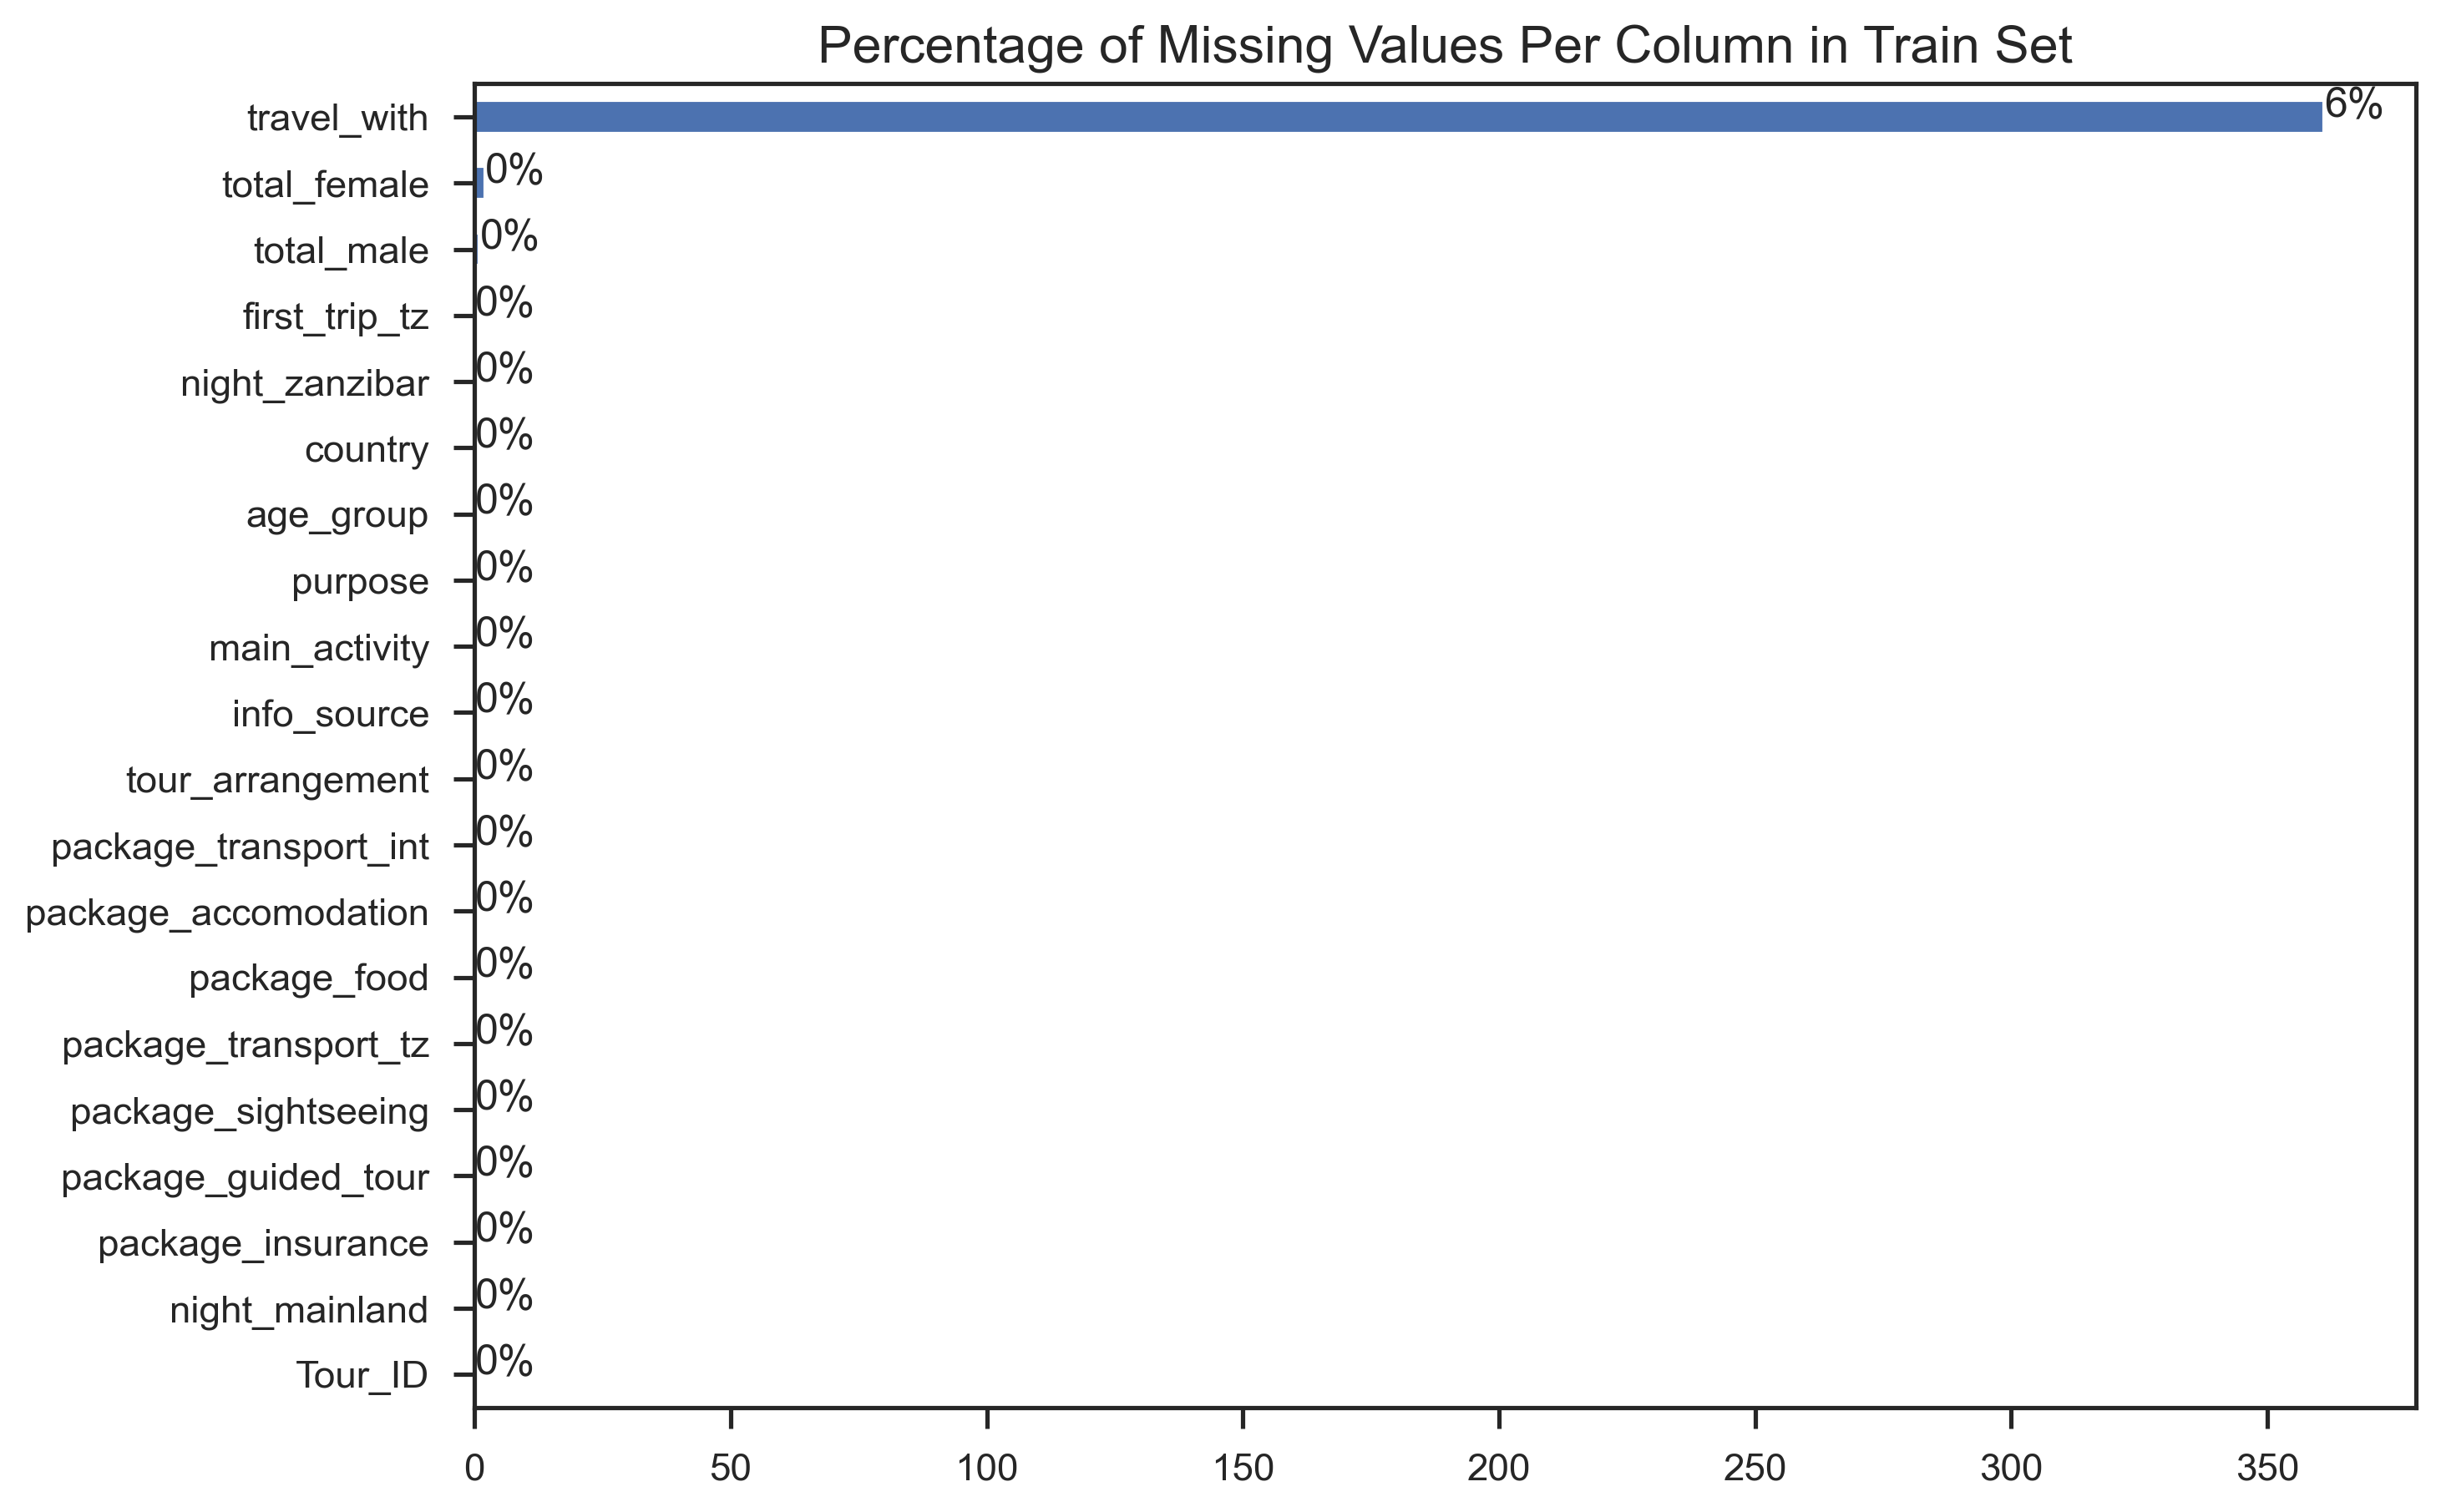

In [237]:
# Check if there any missing values in train set
ax = Test.isna().sum().sort_values().plot(kind = 'barh', figsize = (10, 7))
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/Test.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

# Clearn And Transform the Data

In [238]:
df = Train[Train.total_male == Train.total_female]

In [239]:
# def Clean(Train.travel_with):
#  if (Train.travel_with=="n.a."  & Train.total_female+Train.total_male == "1"):
     
#    return 'Alone'
         
#  return Train.travel_with

In [240]:
# Removes Data Duplicates while Retaining the First one
def remove_duplicate(data):
    data.drop_duplicates(keep="first", inplace=True)
    return "Checked Duplicates"

# Removes Duplicates from train data if any
remove_duplicate(Train)


'Checked Duplicates'

Just to be sure

In [241]:
Train.shape

(18506, 21)

In [242]:
from sklearn.impute import SimpleImputer

In [243]:
for col in Train:
    cat_imputer = SimpleImputer(strategy='most_frequent')
    cat_imputer.fit(Train[[col]])
    Train.loc[:, col] = cat_imputer.transform(Train[[col]])
    Train.loc[:, col] = cat_imputer.transform(Train[[col]])

In [244]:
for col in Test:
    cat_imputer = SimpleImputer(strategy='most_frequent')
    cat_imputer.fit(Test[[col]])
    Test.loc[:, col] = cat_imputer.transform(Test[[col]])
    Test.loc[:, col] = cat_imputer.transform(Test[[col]])

In [245]:
Train.isnull().sum()

Tour_ID                  0
country                  0
age_group                0
travel_with              0
total_female             0
total_male               0
purpose                  0
main_activity            0
info_source              0
tour_arrangement         0
package_transport_int    0
package_accomodation     0
package_food             0
package_transport_tz     0
package_sightseeing      0
package_guided_tour      0
package_insurance        0
night_mainland           0
night_zanzibar           0
first_trip_tz            0
cost_category            0
dtype: int64

In [246]:
# Obj_df = Train.select_dtypes('object')
# columns=[*Obj_df.columns]
# unique_values={}
# for i in columns:
#     unique_values[i]=Obj_df[i].unique()
# unique=pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in unique_values.items() ]))
# unique.fillna('')

# Feature Seclection for Train Data

In [247]:
# X = Train.copy
# y = X('cost_category')
# Train = Train.drop([""])
X = Train.iloc[:,1:20]  #independent columns without the index column
y = Train.iloc[:,-1]    #target column i.e price range
X.shape


(18506, 19)

In [267]:
X_train = X
y_train = y

# Create a dummy column in the Test data and name target
Test['target'] = "Test"
X_test = Test.iloc[:,1:20]
y_test = Test['target']
Test.shape

(6169, 21)

# Categorical Variables

Let use Label Encoding to encode a selected column and selecl categorical features for One-hot Encoding:

In [249]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# import categorical_encoding as ce

if a sklearn.LabelEnocder has been fitted on a training srt, it might break if it encountres new value when used on test set

In [257]:
oe_style = OneHotEncoder()
oe_results = oe_style.fit_transform(Train[["country"]])
pd.DataFrame(oe_results.toarray(), columns=oe_style.categories_).head(2)

AFGHANISTAN ALGERIA ANGOLA ARGENTINA ARMENIA AUSTRALIA AUSTRIA BAHRAIN  \
0         0.0     0.0    0.0       0.0     0.0       0.0     0.0     0.0   
1         0.0     0.0    0.0       0.0     0.0       0.0     0.0     0.0   
2         0.0     0.0    0.0       0.0     0.0       0.0     0.0     0.0   
3         0.0     0.0    0.0       0.0     0.0       0.0     0.0     0.0   
4         0.0     0.0    0.0       0.0     0.0       0.0     0.0     0.0   

  BANGLADESH BARBADOS  ... UKRAIN UNITED ARAB EMIRATES UNITED KINGDOM  \
0        0.0      0.0  ...    0.0                  0.0            0.0   
1        0.0      0.0  ...    0.0                  0.0            1.0   
2        0.0      0.0  ...    0.0                  0.0            0.0   
3        0.0      0.0  ...    0.0                  0.0            0.0   
4        0.0      0.0  ...    0.0                  0.0            0.0   

  UNITED STATES OF AMERICA URUGUAY VENEZUELA VIETNAM YEMEN ZAMBIA ZIMBABWE  
0                      0.0     0.0       0.0     0.0   0.0    0.0      0.0  
1                      0.0     0.0       0.0     0.0   0.0    0.0      0.0  
2                      1.0     0.0       0.0     0.0   0.0    0.0      0.0  
3                      0.0     0.0       0.0     0.0   0.0    0.0      0.0  
4                      1.0     0.0       0.0     0.0   0.0    0.0      0.0  

[5 rows x 131 columns]

In [258]:
COL = 'age_group'

X_train_copy = X_train.copy()
X_test_copy = X_test.copy()

label_enc = LabelEncoder()
label_enc.fit(X_train_copy[COL])
X_train_copy.loc[:, COL] = label_enc.transform(X_train_copy[COL])
X_test_copy.loc[:, COL] = label_enc.transform(X_test_copy[COL])

Select categorical features for one-hot encoding:

In [259]:
CAT_FEATURES = X_train.select_dtypes(include='object') \
                      .columns \
                      .to_list()

 Instantiate the One-Hot Encoder object:

In [260]:
one_hot_encoder = OneHotEncoder(sparse=False, 
                               handle_unknown='error', 
                               drop='first')

 Create the column transformer using the one-hot encoder: 

In [261]:
one_hot_transformer = ColumnTransformer(
    [("one_hot", one_hot_encoder, CAT_FEATURES)]
    #,remainder='passthrough'
)

Fit the transformer:

In [262]:
one_hot_transformer.fit(X_train)

ColumnTransformer(transformers=[('one_hot',
                                 OneHotEncoder(drop='first', sparse=False),
                                 ['age_group', 'travel_with', 'purpose',
                                  'main_activity', 'info_source',
                                  'tour_arrangement', 'package_transport_int',
                                  'package_accomodation', 'package_food',
                                  'package_transport_tz', 'package_sightseeing',
                                  'package_guided_tour', 'package_insurance',
                                  'first_trip_tz'])])

 Apply the transformations to both training and test sets:

In [263]:
col_names = one_hot_transformer.get_feature_names()

X_train_cat = pd.DataFrame(one_hot_transformer.transform(X_train),
                          columns=col_names, 
                          index=X_train.index)

X_train_ohe = pd.concat([X_train, X_train_cat], axis=1) \
                .drop(CAT_FEATURES, axis=1)

X_test_cat = pd.DataFrame(one_hot_transformer.transform(X_test), 
                         columns=col_names, 
                         index=X_test.index)
                         
X_test_ohe = pd.concat([X_test, X_test_cat], axis=1) \
               .drop(CAT_FEATURES, axis=1)

In [ ]:

from sklearn.base import BaseEstimator,TransformerMixin


class EncodeCategorical(BaseEstimator, TransformerMixin):
    """
    Encodes a specified list of columns or all columns if None.
    """

    def __init__(self, columns=None):
        self.columns  = [col for col in columns]
        self.encoders = None

    def fit(self, data, target=None):
        """
        Expects a data frame with named columns to encode.
        """
        # Encode all columns if columns is None
        if self.columns is None:
            self.columns = data.columns

        # Fit a label encoder for each column in the data frame
        self.encoders = {
            column: LabelEncoder().fit(data[column])
            for column in self.columns
        }
        return self

    def transform(self, data):
        """
        Uses the encoders to transform a data frame.
        """
        output = data.copy()
        for column, encoder in self.encoders.items():
            output[column] = encoder.transform(data[column])

        return output

<AxesSubplot:>

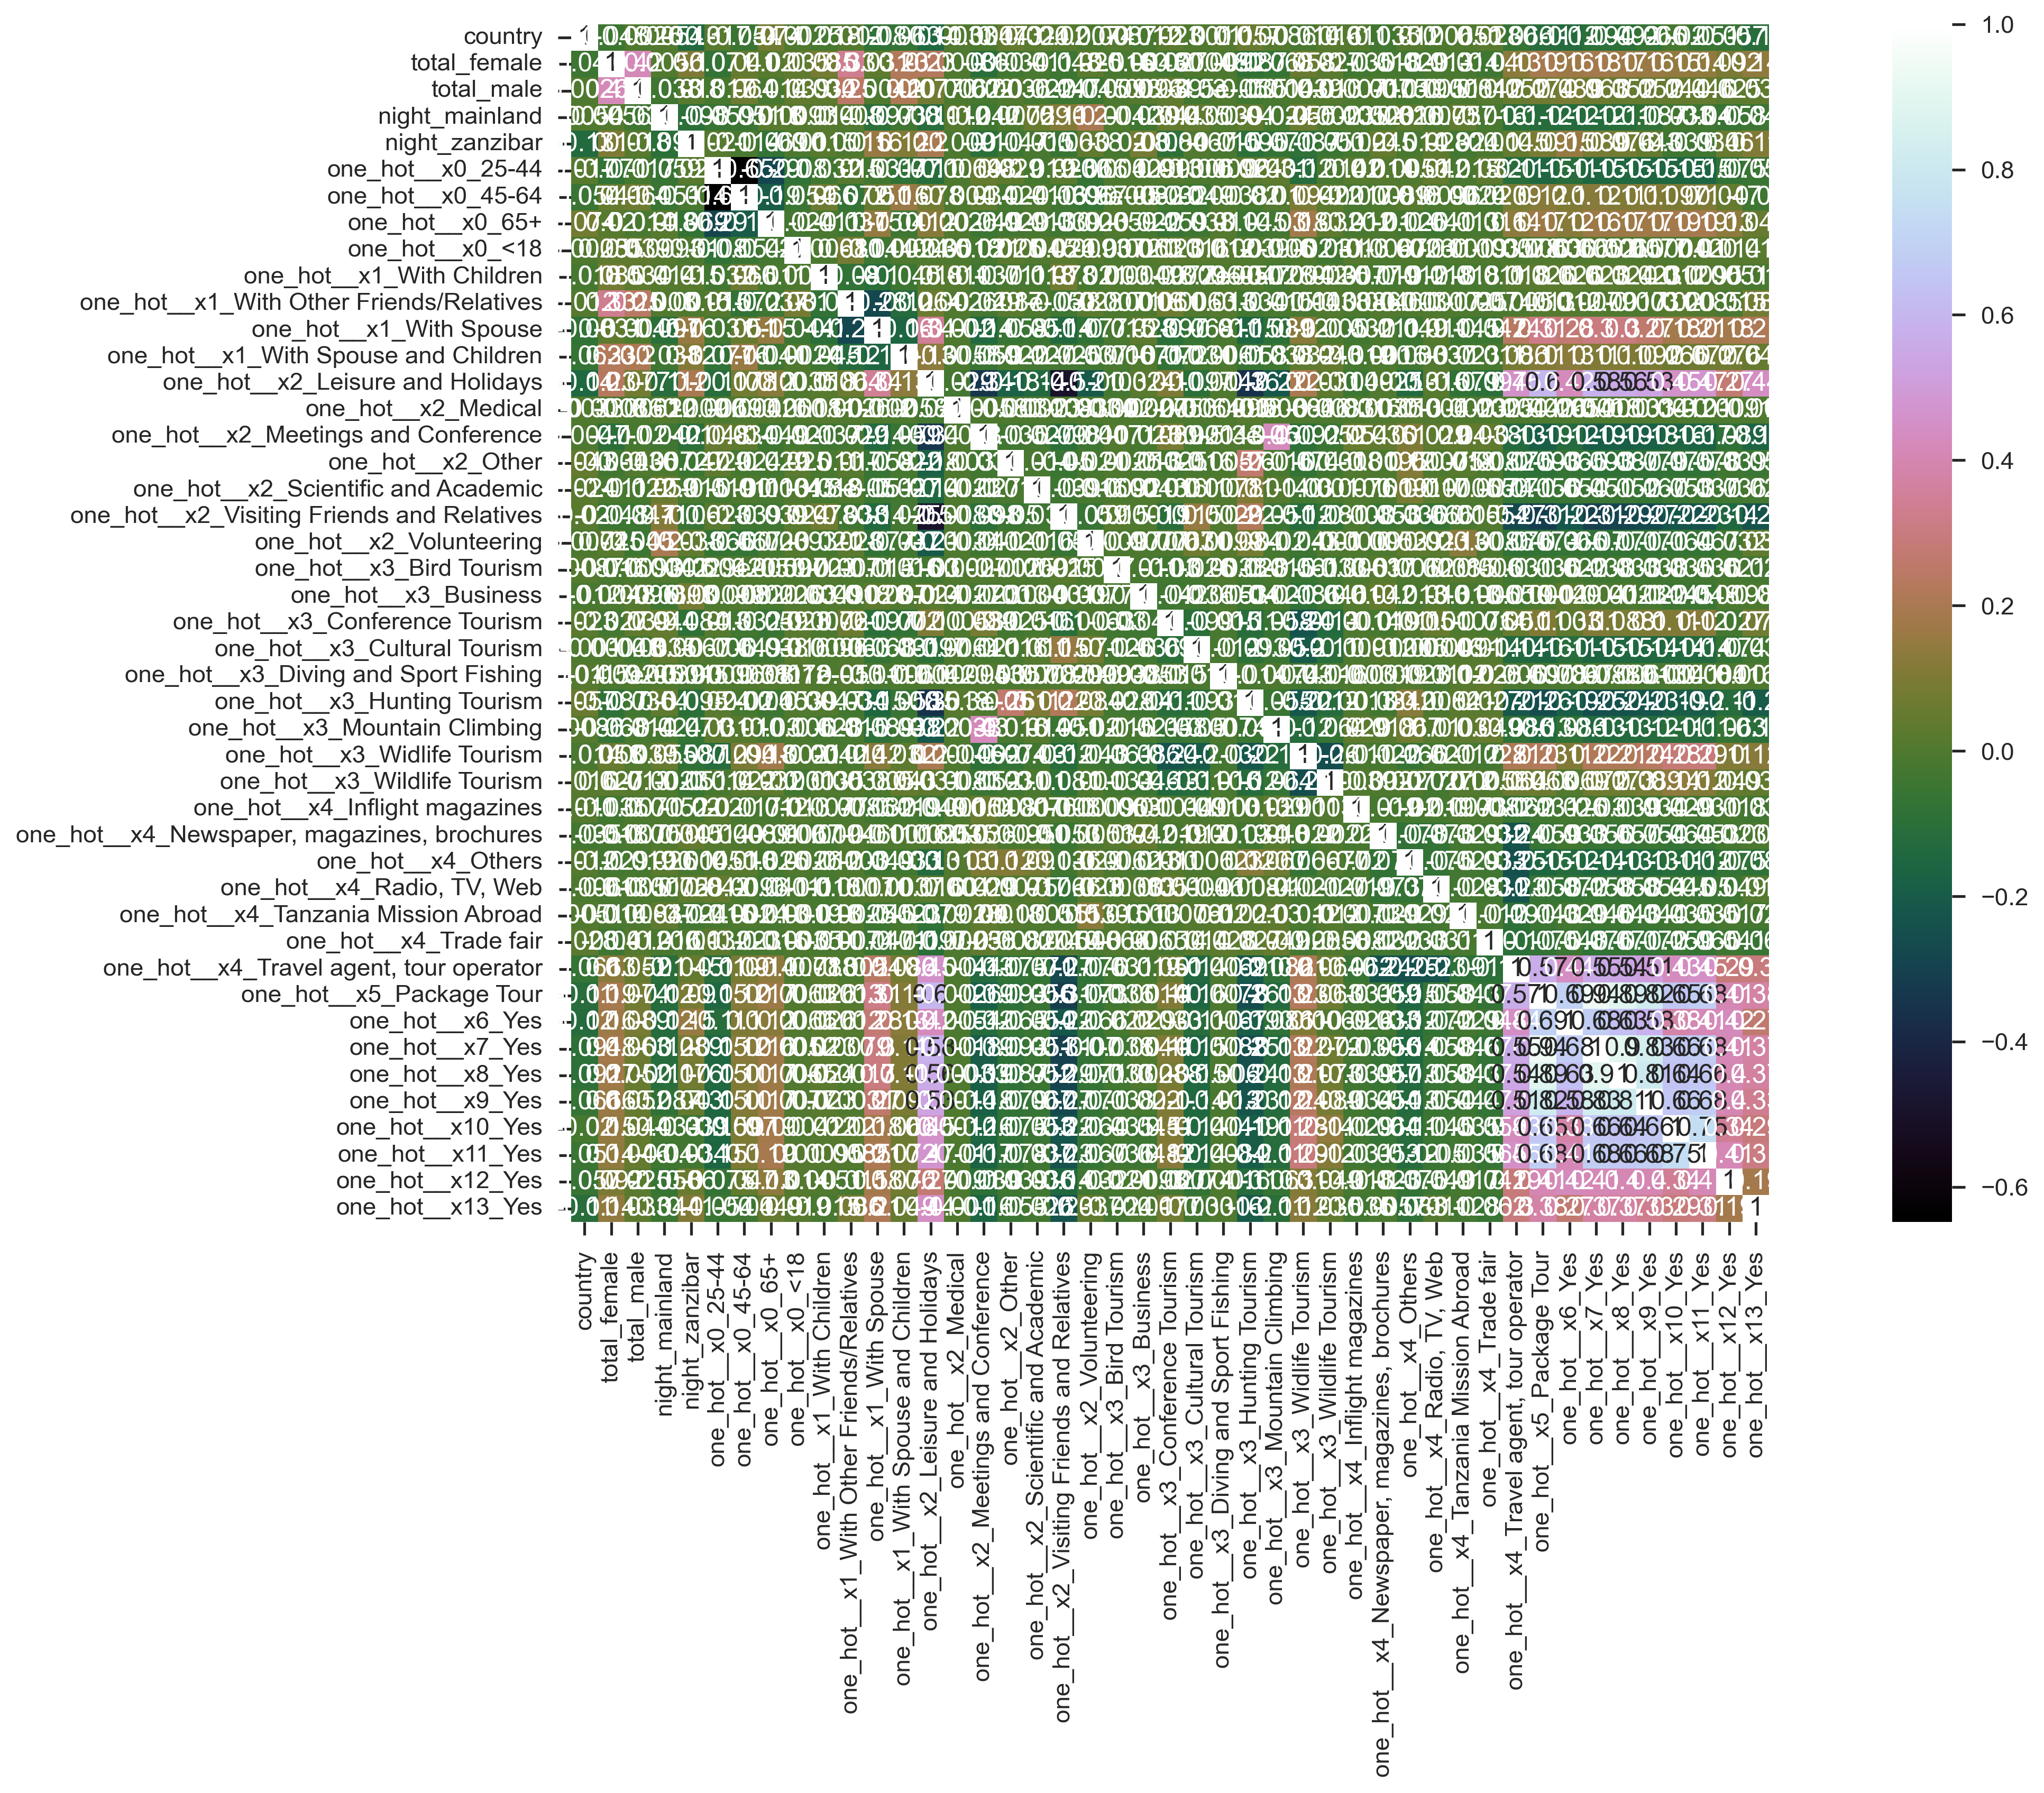

In [270]:
# GETTING Correllation matrix
corr_mat=X_train_ohe.corr(method='pearson')
plt.figure(figsize=(20,10))
sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='cubehelix')

In [272]:
from sklearn.preprocessing import StandardScaler
X_Train=X_train_ohe.values
X_Train=np.asarray(X_Train)

# Finding normalised array of X_Train
X_std=StandardScaler().fit_transform(X_Train)

Text(0, 0.5, 'Cumulative explained variance')

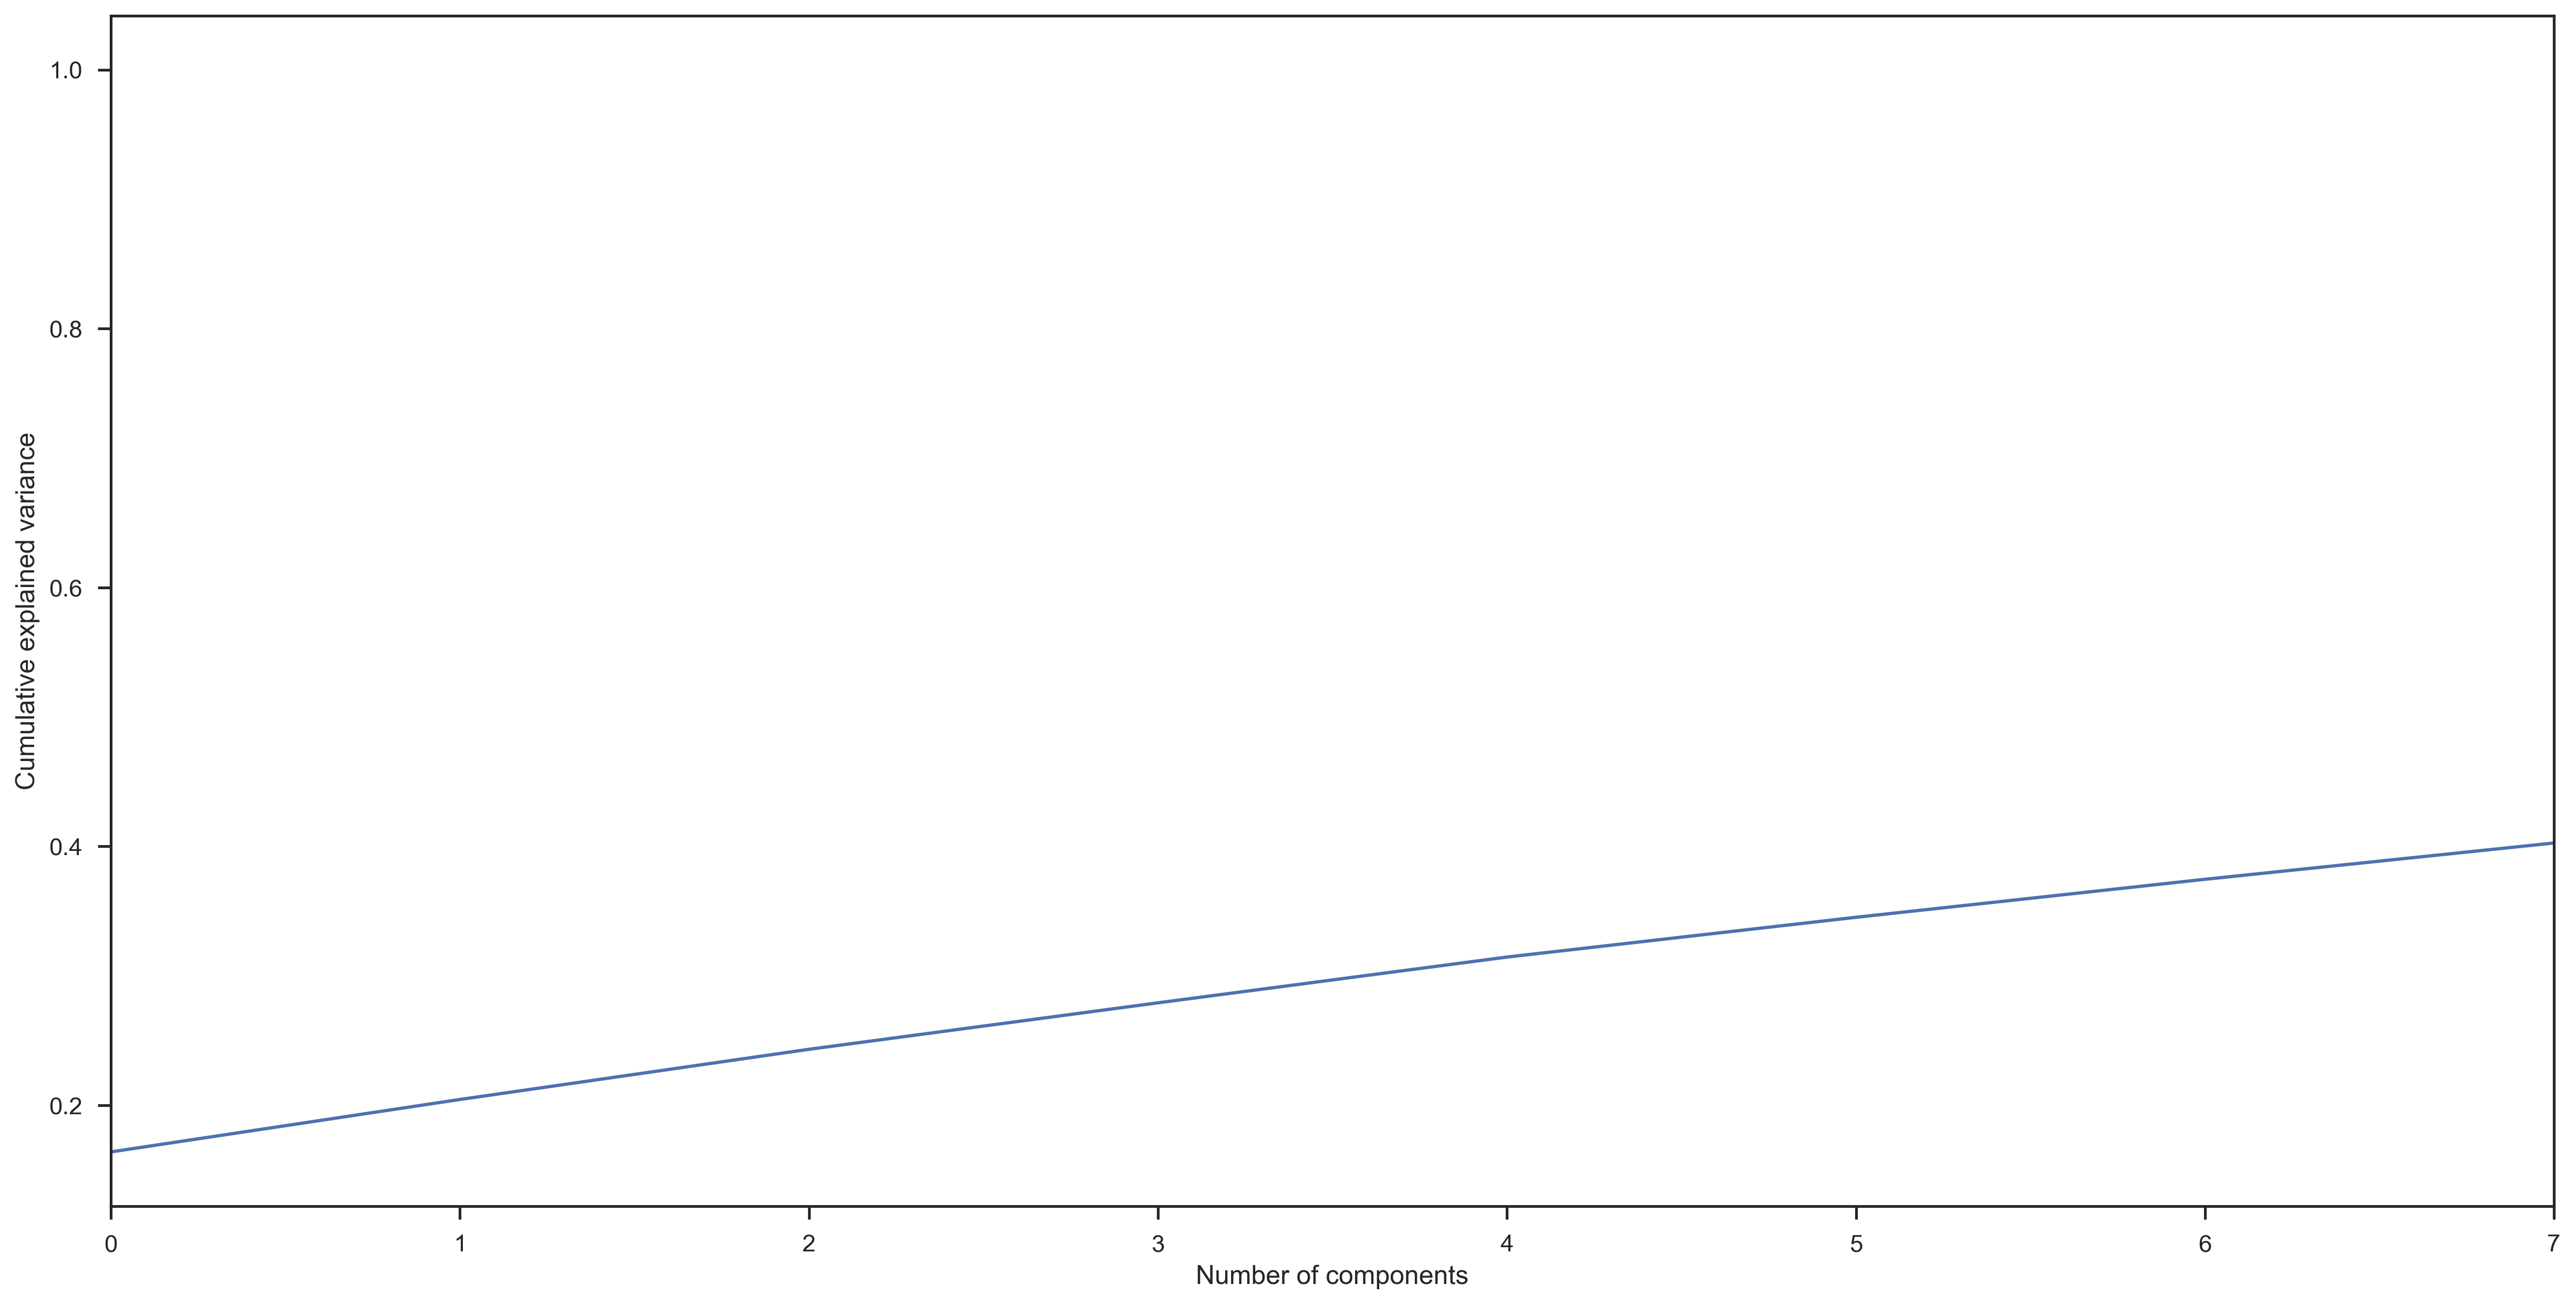

In [273]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,7,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

# Modeling and Evaluation

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn import tree
from sklearn import svm
import statsmodels.formula.api as smf
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D
from sklearn import neighbors
from sklearn import linear_model

from ipywidgets import Image
import pydotplus
from io import StringIO

Create the instance of the model, fit it to the training data and create prediction:

In [ ]:
tree_classifier = DecisionTreeClassifier(random_state=42)
tree_classifier.fit(X_train_ohe, y_train)
y_pred = tree_classifier.predict(X_test_ohe)


# Common metrics for evaluating classifiers
Precision is the number of correct positive results divided by the number of all positive results (e.g. How many of the mushrooms we predicted would be edible actually were?).

Recall is the number of correct positive results divided by the number of positive results that should have been returned (e.g. How many of the mushrooms that were poisonous did we accurately predict were poisonous?).

The F1 score is a measure of a test’s accuracy. It considers both the precision and the recall of the test to compute the score. The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst at 0.

# Feature Importance

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_train,y_train)

print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

ValueError: could not convert string to float: '45-64'

# Heatmap

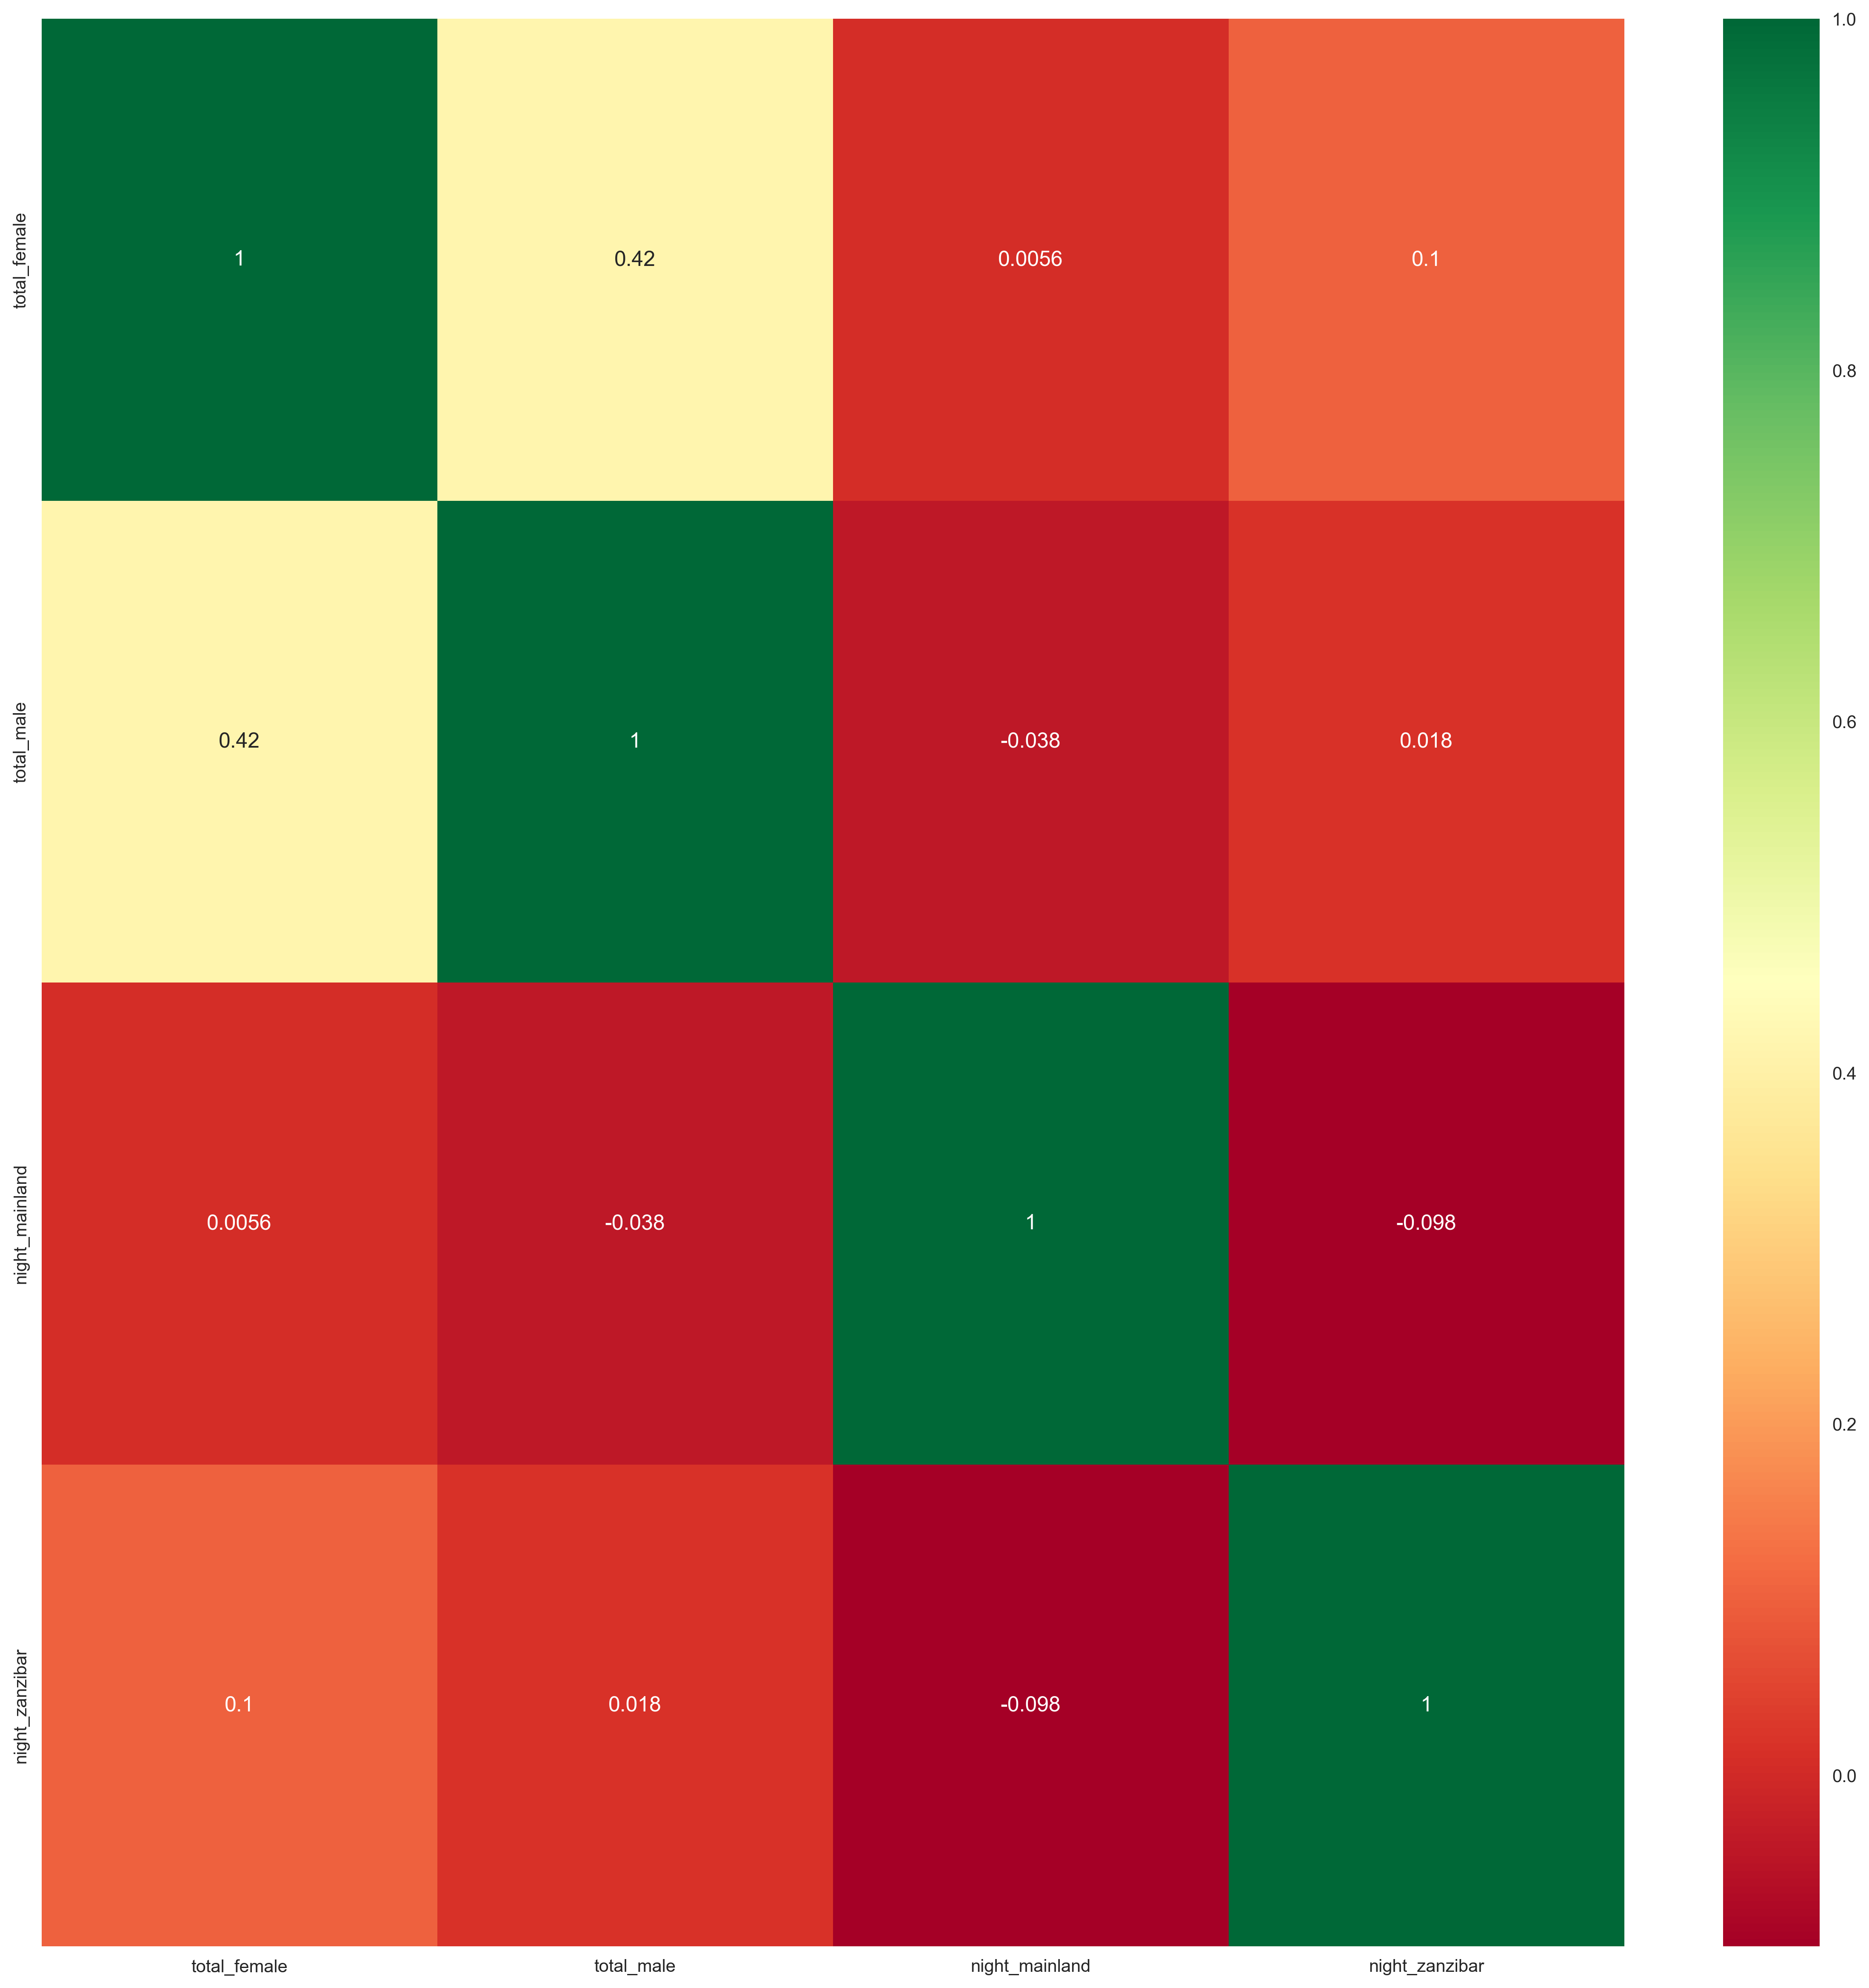

In [ ]:
#get correlations of each features in dataset
corrmat = Train.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(Train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

precision = true positives / (true positives + false positives)

recall = true positives / (false negatives + true positives)

F1 score = 2 * ((precision * recall) / (precision + recall))

In [ ]:
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline


def model_selection(X, y, estimator):
    """
    Test various estimators.
    """
    y = LabelEncoder().fit_transform(y.values.ravel())
    model = Pipeline([
         ('label_encoding', EncodeCategorical(X.keys())),
         ('one_hot_encoder', OneHotEncoder()),
         ('estimator', estimator)
    ])

    # Instantiate the classification model and visualizer
    model.fit(X, y)  

    expected  = y
    predicted = model.predict(X)

    # Compute and return the F1 score (the harmonic mean of precision and recall)
    return (f1_score(expected, predicted))

: 

# Models

In [ ]:
# Try them all!
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier

: 

In [ ]:
model_selection(X, y, LinearSVC())

: 

In [ ]:
model_selection(X, y, NuSVC())

: 

In [ ]:
model_selection(X, y, SVC())

: 

In [ ]:
model_selection(X, y, SGDClassifier())

: 

In [ ]:
model_selection(X, y, KNeighborsClassifier())

: 

In [ ]:
model_selection(X, y, LogisticRegressionCV())

: 

In [ ]:
model_selection(X, y, LogisticRegression())

: 

In [ ]:
model_selection(X, y, BaggingClassifier())

: 

In [ ]:
model_selection(X, y, ExtraTreesClassifier())

: 

In [ ]:
model_selection(X, y, RandomForestClassifier())

: 

# Visual Model Evaluation
Now let’s refactor our model evaluation function to use Yellowbrick’s ClassificationReport class, a model visualizer that displays the precision, recall, and F1 scores. This visual model analysis tool integrates numerical scores as well color-coded heatmap in order to support easy interpretation and detection, particularly the nuances of Type I and Type II error, which are very relevant (lifesaving, even) to our use case!

Type I error (or a “false positive”) is detecting an effect that is not present (e.g. determining a mushroom is poisonous when it is in fact edible).

Type II error (or a “false negative”) is failing to detect an effect that is present (e.g. believing a mushroom is edible when it is in fact poisonous).

In [ ]:
from sklearn.pipeline import Pipeline
from yellowbrick.classifier import ClassificationReport


def visual_model_selection(X, y, estimator):
    """
    Test various estimators.
    """
    y = LabelEncoder().fit_transform(y.values.ravel())
    model = Pipeline([
         ('label_encoding', EncodeCategorical(X.keys())),
         ('one_hot_encoder', OneHotEncoder()),
         ('estimator', estimator)
    ])

    # Instantiate the classification model and visualizer
    visualizer = ClassificationReport(model, classes=['edible', 'poisonous'])
    visualizer.fit(X, y)  
    visualizer.score(X, y)
    visualizer.poof()  

: 

: 

In [254]:
class LabelEncoderExt(object):
    def __init__(self):
        """
        It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]
        Unknown will be added in fit and transform will take care of new item. It gives unknown class id
        """
        self.label_encoder = LabelEncoder()
        # self.classes_ = self.label_encoder.classes_

    def fit(self, data_list):
        """
        This will fit the encoder for all the unique values and introduce unknown value
        :param data_list: A list of string
        :return: self
        """
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_

        return self

    def transform(self, data_list):
        """
        This will transform the data_list to id list where the new values get assigned to Unknown class
        :param data_list:
        :return:
        """
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['unknown' if x==unique_item else x for x in new_data_list]

        return self.label_encoder.transform(new_data_list)

In [256]:
COL = Train.select_dtypes('objects')

X_train = X_train.copy()
X_test = X_test.copy()

LE = LabelEncoderExt()
LE.fit(X_train[COL])
X_train.loc[:,COL] = LE.transform(X_train[COL])
X_test.loc[:,COL] = LE.transform(X_test[COL])

TypeError: data type 'objects' not understood

In [ ]:
Cat_feature = X_train.select_dtypes(include='object') \
                      .columns \
                      .to_list()

In [ ]:
one_hot_encoder = OneHotEncoder(sparse=False, 
                               handle_unknown='error', 
                               drop='first')

In [ ]:
one_hot_transformer = ColumnTransformer(
    [("one_hot", one_hot_encoder, Cat_feature)]
    #,remainder='passthrough'
)

In [ ]:
one_hot_transformer.fit(X_train)

ColumnTransformer(transformers=[('one_hot',
                                 OneHotEncoder(drop='first', sparse=False),
                                 ['age_group', 'travel_with', 'purpose',
                                  'main_activity', 'info_source',
                                  'tour_arrangement', 'package_transport_int',
                                  'package_accomodation', 'package_food',
                                  'package_transport_tz', 'package_sightseeing',
                                  'package_guided_tour', 'package_insurance',
                                  'first_trip_tz'])])

# Apply the transformations to both training and test sets:

In [ ]:
col_names = one_hot_transformer.get_feature_names()

X_train_cat = pd.DataFrame(one_hot_transformer.transform(X_train),
                          columns=col_names, 
                          index=X_train.index)
X_train_ohe = pd.concat([X_train, X_train_cat], axis=1) \
                .drop(Cat_feature, axis=1)

X_test_cat = pd.DataFrame(one_hot_transformer.transform(X_test), 
                         columns=col_names, 
                         index=X_test.index)
X_test_ohe = pd.concat([X_test, X_test_cat], axis=1) \
               .drop(Cat_feature, axis=1)

ValueError: Found unknown categories [nan] in column 1 during transform

In [ ]:
# GETTING Correllation matrix
corr_mat=X_train.corr(method='pearson')
plt.figure(figsize=(20,10))
sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='cubehelix')

In [ ]:

from sklearn.base import BaseEstimator,TransformerMixin


class EncodeCategorical(BaseEstimator, TransformerMixin):
    """
    Encodes a specified list of columns or all columns if None.
    """

    def __init__(self, columns=None):
        self.columns  = [col for col in columns]
        self.encoders = None

    def fit(self, data, target=None):
        """
        Expects a data frame with named columns to encode.
        """
        # Encode all columns if columns is None
        if self.columns is None:
            self.columns = data.columns

        # Fit a label encoder for each column in the data frame
        self.encoders = {
            column: LabelEncoder().fit(data[column])
            for column in self.columns
        }
        return self

    def transform(self, data):
        """
        Uses the encoders to transform a data frame.
        """
        output = data.copy()
        for column, encoder in self.encoders.items():
            output[column] = encoder.transform(data[column])

        return output

# Modeling and Evaluation
# Common metrics for evaluating classifiers
Precision is the number of correct positive results divided by the number of all positive results (e.g. How many of the mushrooms we predicted would be edible actually were?).

Recall is the number of correct positive results divided by the number of positive results that should have been returned (e.g. How many of the mushrooms that were poisonous did we accurately predict were poisonous?).

The F1 score is a measure of a test’s accuracy. It considers both the precision and the recall of the test to compute the score. The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst at 0.

# Feature Importance

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_train,y_train)

print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

ValueError: could not convert string to float: '45-64'

# Heatmap

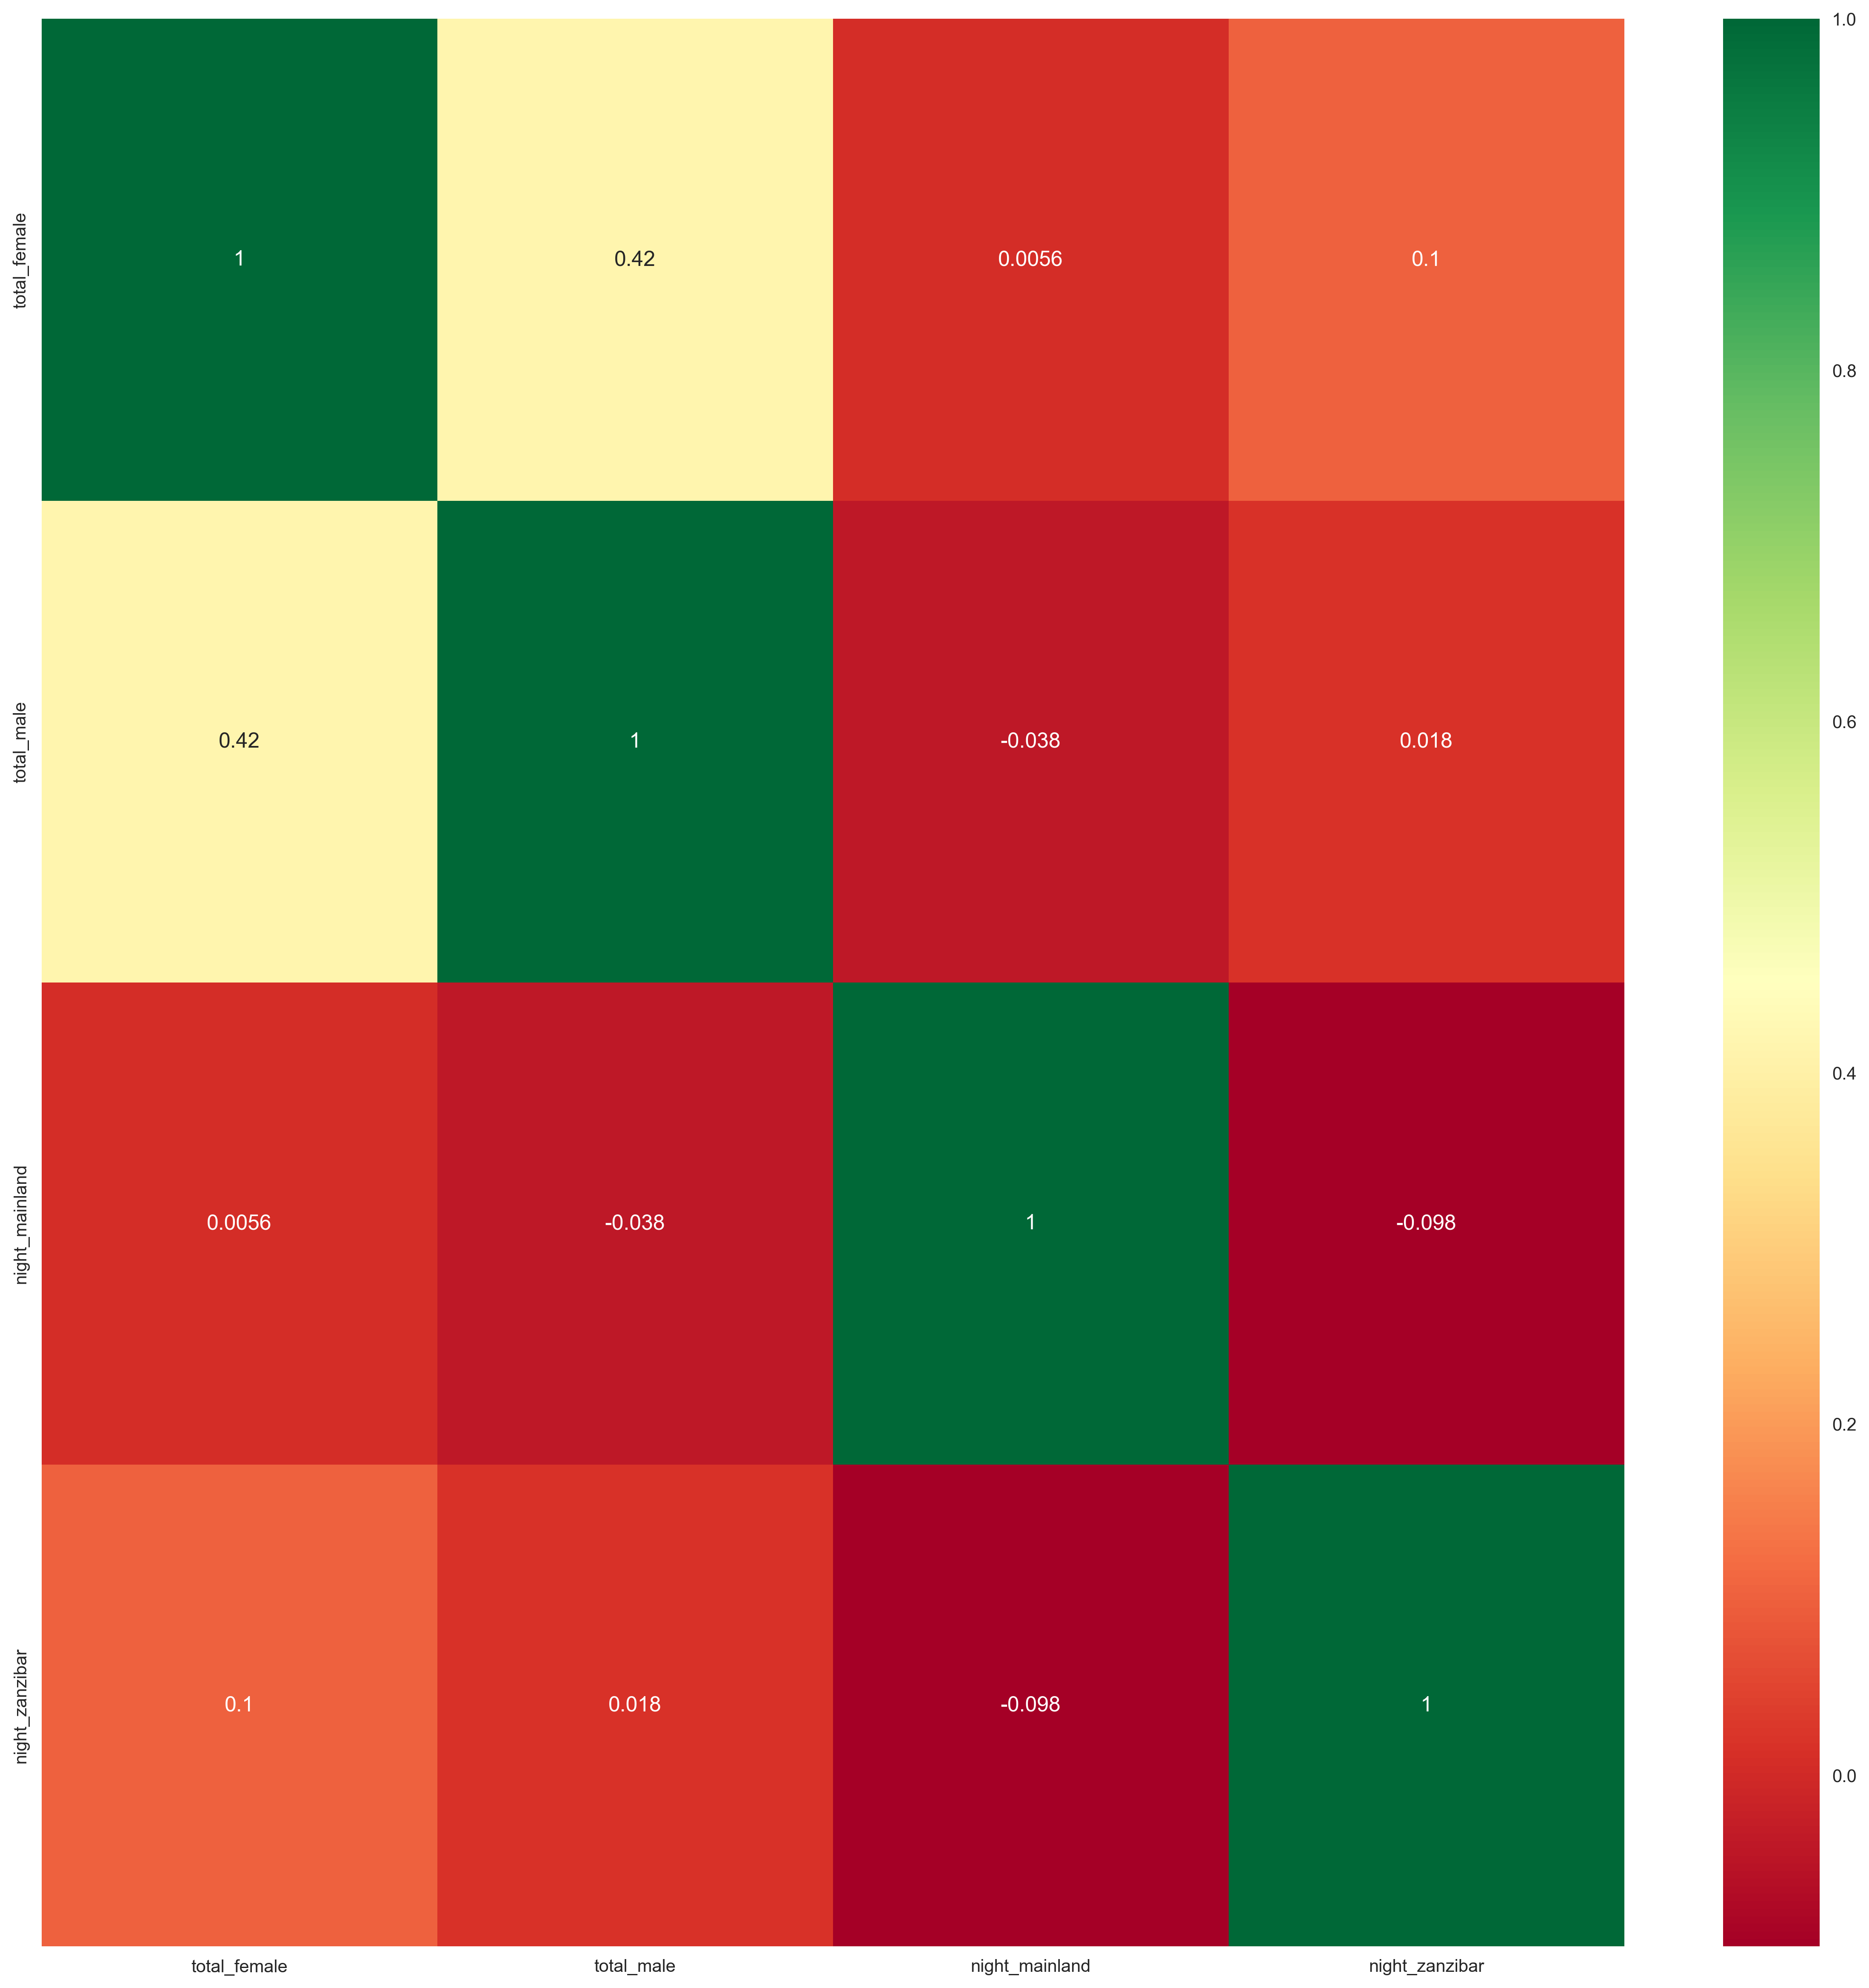

In [ ]:
#get correlations of each features in dataset
corrmat = Train.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(Train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

precision = true positives / (true positives + false positives)

recall = true positives / (false negatives + true positives)

F1 score = 2 * ((precision * recall) / (precision + recall))

In [ ]:
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline


def model_selection(X, y, estimator):
    """
    Test various estimators.
    """
    y = LabelEncoder().fit_transform(y.values.ravel())
    model = Pipeline([
         ('label_encoding', EncodeCategorical(X.keys())),
         ('one_hot_encoder', OneHotEncoder()),
         ('estimator', estimator)
    ])

    # Instantiate the classification model and visualizer
    model.fit(X, y)  

    expected  = y
    predicted = model.predict(X)

    # Compute and return the F1 score (the harmonic mean of precision and recall)
    return (f1_score(expected, predicted))

: 

# Models

In [ ]:
# Try them all!
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier

: 

In [ ]:
model_selection(X, y, LinearSVC())

: 

In [ ]:
model_selection(X, y, NuSVC())

: 

In [ ]:
model_selection(X, y, SVC())

: 

In [ ]:
model_selection(X, y, SGDClassifier())

: 

In [ ]:
model_selection(X, y, KNeighborsClassifier())

: 

In [ ]:
model_selection(X, y, LogisticRegressionCV())

: 

In [ ]:
model_selection(X, y, LogisticRegression())

: 

In [ ]:
model_selection(X, y, BaggingClassifier())

: 

In [ ]:
model_selection(X, y, ExtraTreesClassifier())

: 

In [ ]:
model_selection(X, y, RandomForestClassifier())

: 

# Visual Model Evaluation
Now let’s refactor our model evaluation function to use Yellowbrick’s ClassificationReport class, a model visualizer that displays the precision, recall, and F1 scores. This visual model analysis tool integrates numerical scores as well color-coded heatmap in order to support easy interpretation and detection, particularly the nuances of Type I and Type II error, which are very relevant (lifesaving, even) to our use case!

Type I error (or a “false positive”) is detecting an effect that is not present (e.g. determining a mushroom is poisonous when it is in fact edible).

Type II error (or a “false negative”) is failing to detect an effect that is present (e.g. believing a mushroom is edible when it is in fact poisonous).

In [ ]:
from sklearn.pipeline import Pipeline
from yellowbrick.classifier import ClassificationReport


def visual_model_selection(X, y, estimator):
    """
    Test various estimators.
    """
    y = LabelEncoder().fit_transform(y.values.ravel())
    model = Pipeline([
         ('label_encoding', EncodeCategorical(X.keys())),
         ('one_hot_encoder', OneHotEncoder()),
         ('estimator', estimator)
    ])

    # Instantiate the classification model and visualizer
    visualizer = ClassificationReport(model, classes=['edible', 'poisonous'])
    visualizer.fit(X, y)  
    visualizer.score(X, y)
    visualizer.poof()  

: 

: 